# Directory

In [1]:
directory = ""
    
print(directory)

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import seaborn as sns

print("libraries imported!")

libraries imported!


# variables

In [3]:
plt.style.use("Solarize_Light2")

In [4]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']

In [5]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

habitantes.to_csv(directory + "habitantes.csv")
habitantes

Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

# CASOS

Casos diarios y acumulados

In [6]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        7       0           1           0      6       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-12-03     1220     155         164         626     20      17   
2021-12-04      770     142          65         411     34      18   
2021-12-05      531      83          28         310     17       1   
2021-12-06     1276      34         127         857      5      10   
2021-12-07     1489     152          86         890     38      17   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-12-03          44     146     7     41  
2021-12-04          28      53     5     14  
2021-12-05          31      39    10     12  
2021-12-06          32     174     9     28  
2021-12-07          44     200    13     49  

[638 rows x 10 columns]

In [7]:
#promedio movil casos
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [8]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        1       0           0           1      0       0   
2020-03-13        8       0           1           1      6       0   
2020-03-14        8       0           1           1      6       0   
...             ...     ...         ...         ...    ...     ...   
2021-12-03   541997  108055       81381      195184  25556   24679   
2021-12-04   542767  108197       81446      195595  25590   24697   
2021-12-05   543298  108280       81474      195905  25607   24698   
2021-12-06   544574  108314       81601      196762  25612   24708   
2021-12-07   546063  108466       81687      197652  25650   24725   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10           0       0      0      0  
2020-03-11           0       0      0      0  
2020-03-12           0       0      0      0  
2020-03-13           0       0      0      0  
2020-03-14           0       0      0      0  
...                ...     ...    ...    ...  
2021-12-03       36343   42721  20822   7256  
2021-12-04       36371   42774  20827   7270  
2021-12-05       36402   42813  20837   7282  
2021-12-06       36434   42987  20846   7310  
2021-12-07       36478   43187  20859   7359  

[638 rows x 10 columns]

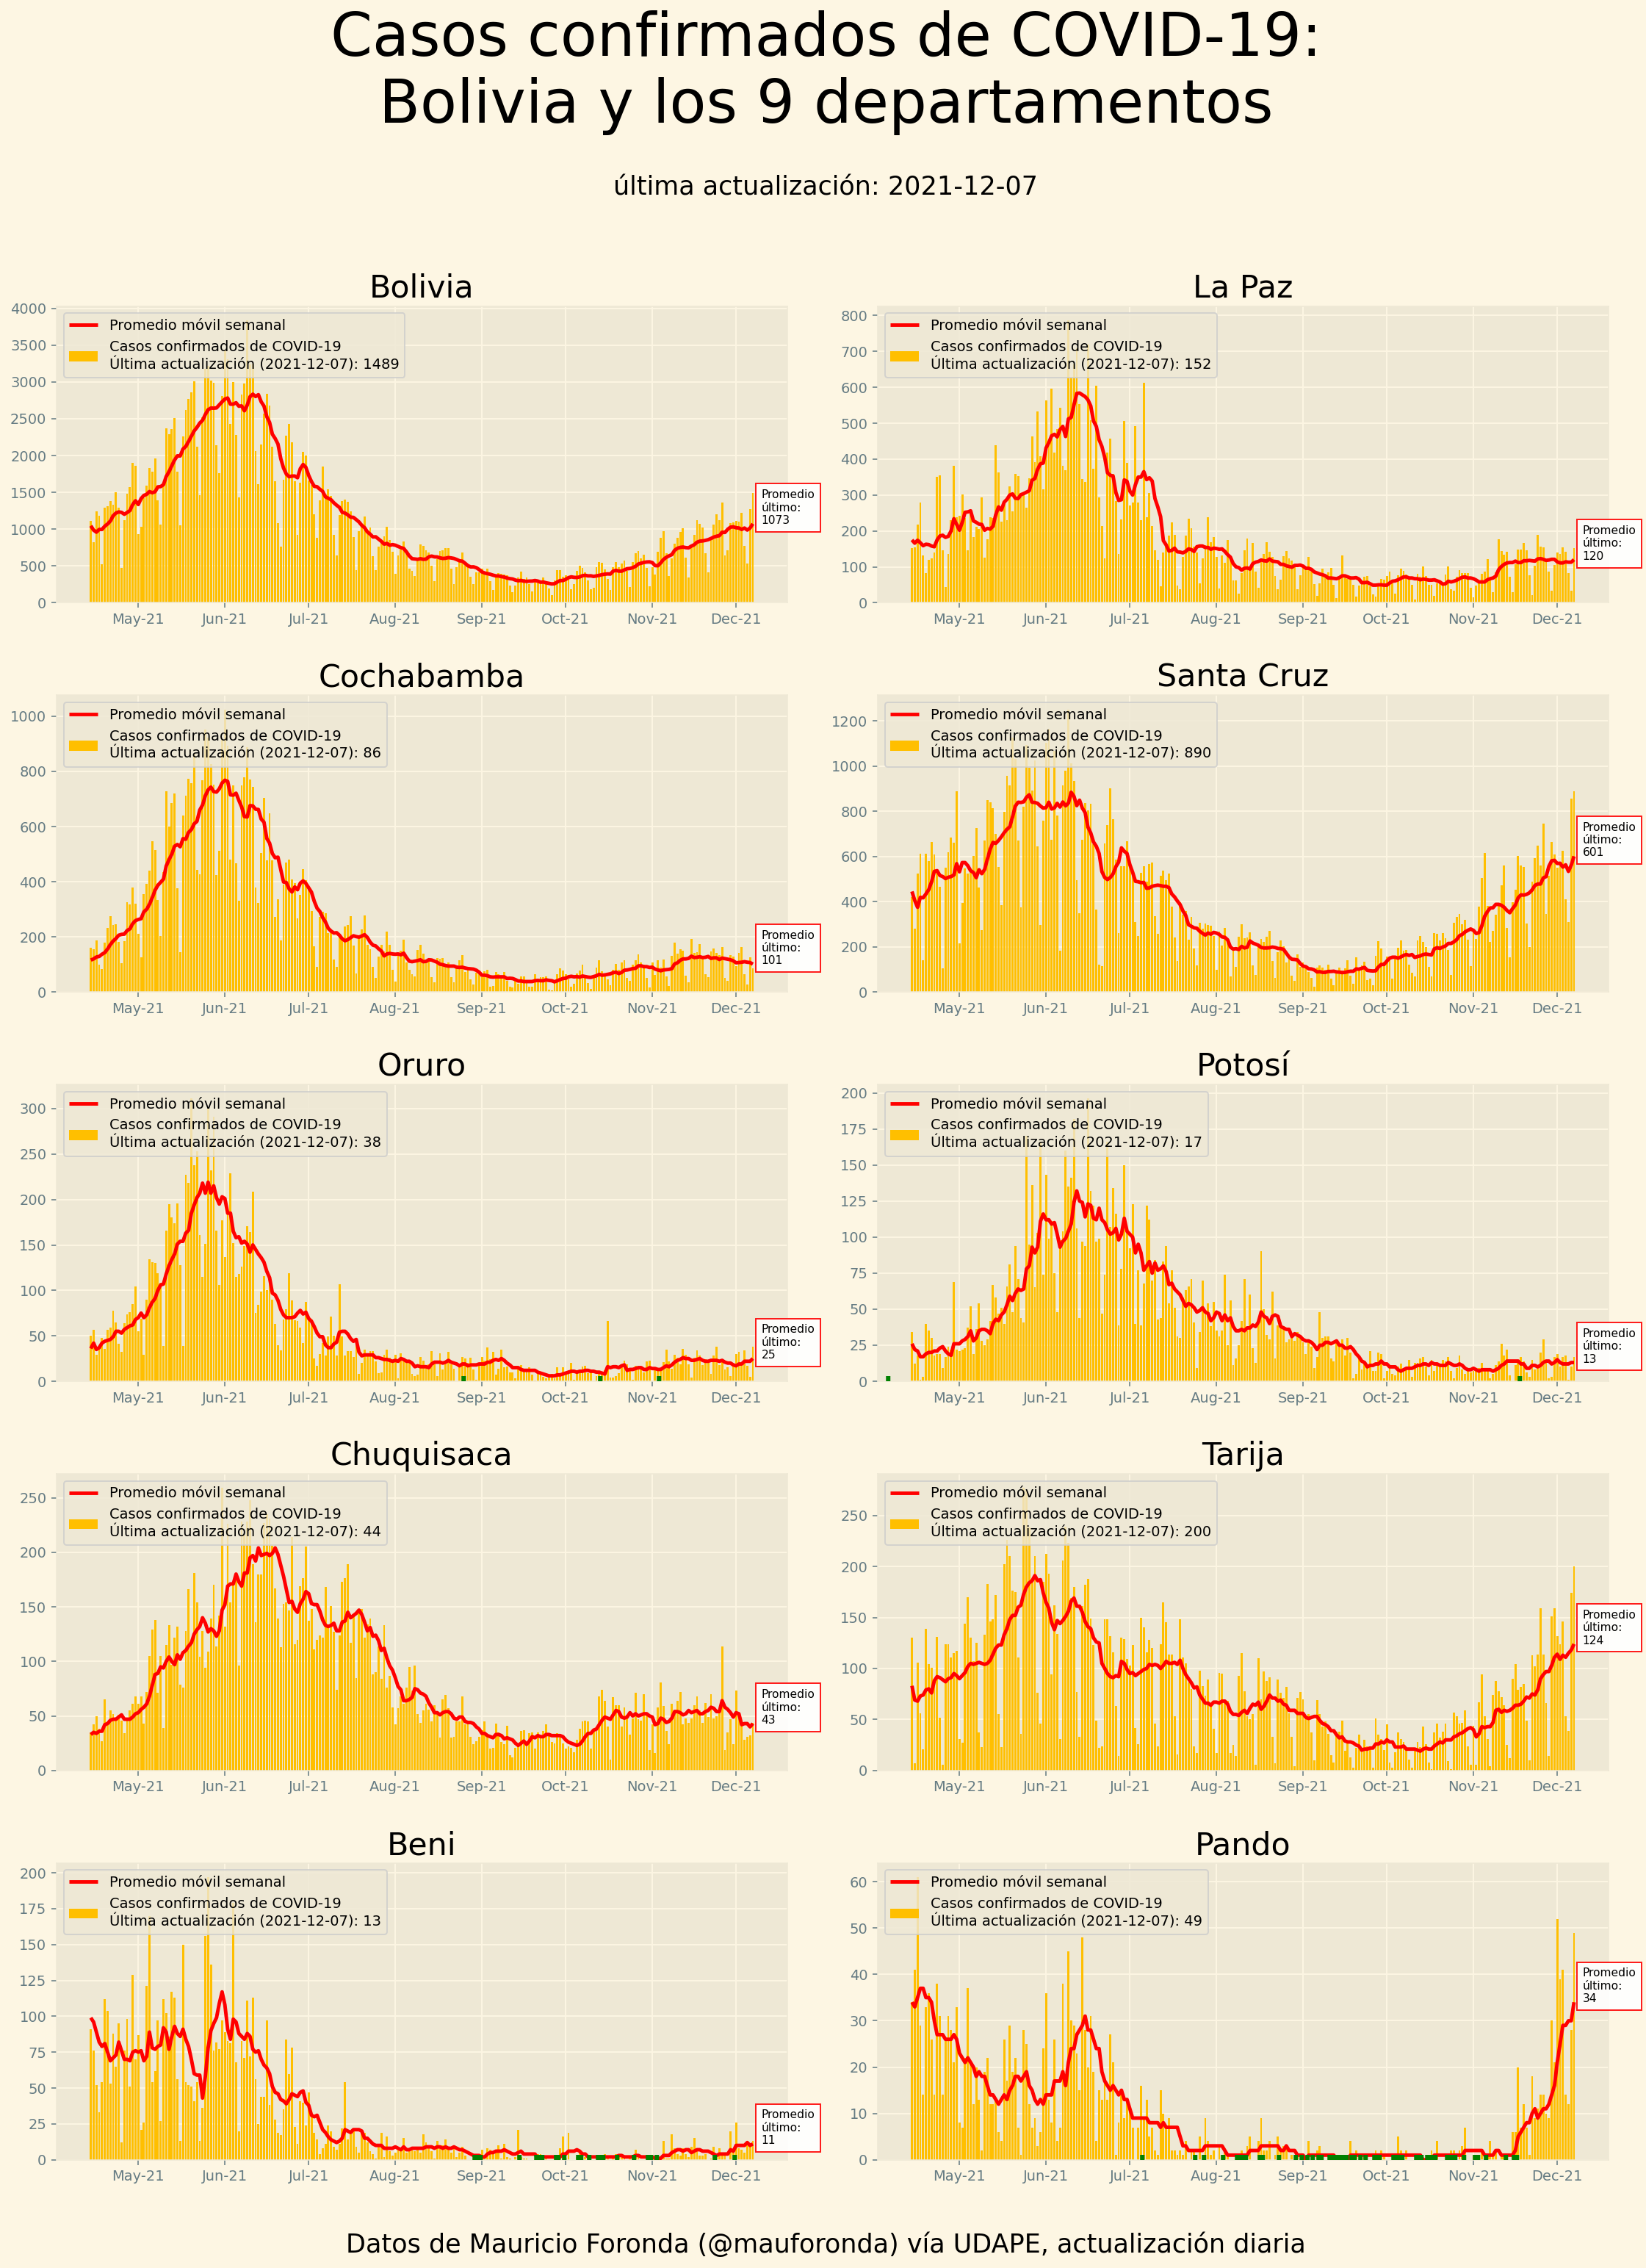

In [9]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)
axs = axs.flatten()

fig.suptitle("Casos confirmados de COVID-19:\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(.5, .97, "última actualización: {}".format(casos_diarios.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)

start_day = 400

for i in range(10):
    axs[i].grid(zorder=3)
    axs[i].bar(casos_diarios.index[start_day:], casos_diarios[casos_diarios.columns[i]][start_day:], 
             color = "#ffbf00", 
             label="Casos confirmados de COVID-19\nÚltima actualización ({}): {}".format(casos_diarios.index[-1].date(),casos_diarios.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
    axs[i].set_title(casos_diarios.columns[i], fontsize = 22)
    axs[i].plot(casos_diarios.index[start_day:], casos_diarios7[casos_diarios7.columns[i]][start_day:], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=2.5)
    #axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.20)
    #axs[i].set_xlim(casos_diarios.index[30], casos_diarios.index[-1] + datetime.timedelta(days=10))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


    axs[i].annotate( "Promedio\núltimo:\n" + str(casos_diarios7.iloc[-1,i].astype(int)),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=3), casos_diarios7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .9}
          )
    #if casos_diarios.iloc[:,i]==0:
    no_cases_df= casos_diarios[casos_diarios.iloc[:,i]==0].iloc[:,i]
    for k in range(len(no_cases_df)):
                 axs[i].annotate(text=".",
                     xy=(no_cases_df.index[k], no_cases_df[k]),
                     fontsize=30,
                     color="g",
                     label="0 casos en este día"
                                )
    axs[i].legend(loc="upper left")

fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)

In [10]:
fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

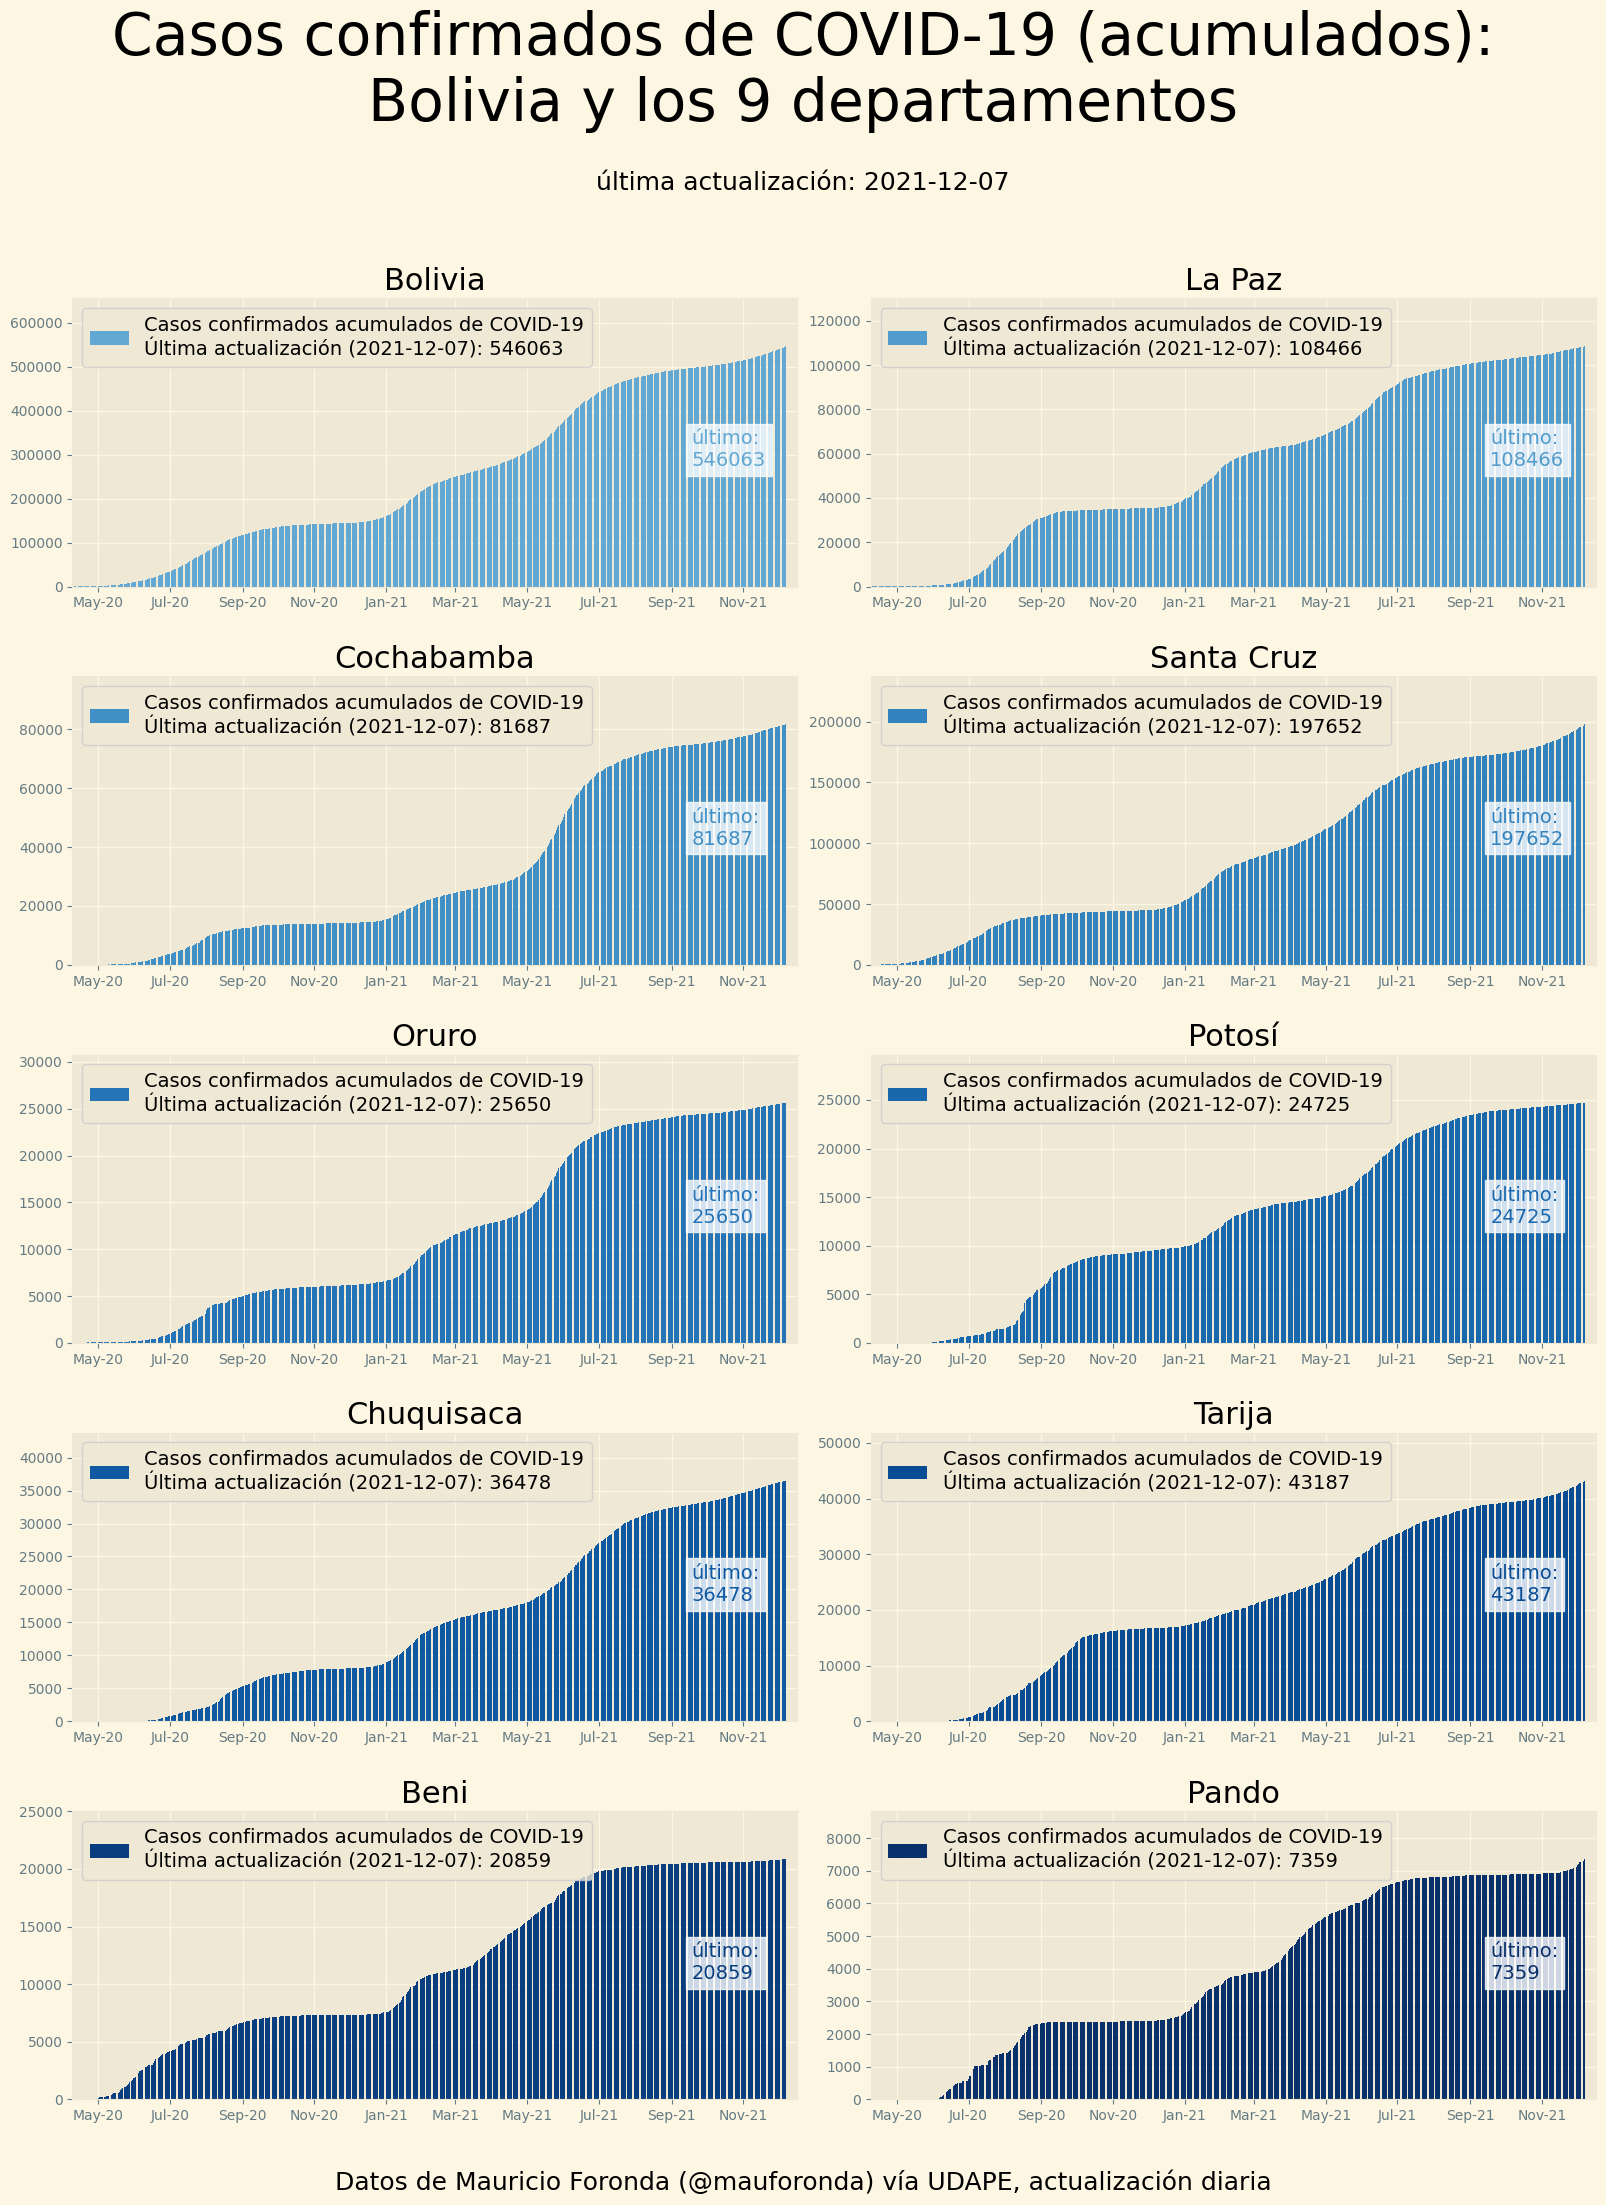

In [11]:
fig, axs = plt.subplots(5,2, figsize = (16,20), 
                        dpi=100,
                        sharey=False
                        )
axs = axs.flatten()


fig.suptitle("Casos confirmados de COVID-19 (acumulados):\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(.5, .97, "última actualización: {}".format(casos_acumulados.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)


for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_acumulados.index, casos_acumulados[casos_acumulados.columns[i]], 
             color = plt.get_cmap("Blues",20)(range(10,20))[i], 
             label="Casos confirmados acumulados de COVID-19\nÚltima actualización ({}): {}".format(casos_acumulados.index[-1].date(),casos_acumulados.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
  axs[i].set_title(casos_acumulados.columns[i], fontsize = 22)
  #axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=4)
  #axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_acumulados[casos_acumulados.columns[i]].max()*1.20)
  axs[i].set_xlim(casos_acumulados.index[30], casos_acumulados.index[-1] + datetime.timedelta(days=10))
  axs[i].legend(loc="upper left", fontsize=14)
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "último:\n" + str(casos_acumulados.iloc[-1,i].astype(int)),
      xy = (casos_acumulados.index[-1] - datetime.timedelta(days=80), casos_acumulados.iloc[-1,i]/2),
      fontsize=14,
      color = cm.get_cmap("Blues",20)(range(10,20))[i],
      bbox={
              'edgecolor': 'w',
              'facecolor': 'w', 
              'alpha': .8}
          )


fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)


In [12]:
fig.savefig(directory + "graficas/casos_todos_acum.jpg", bbox_inches="tight")

# Muertes

In [13]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-12-03        5       0           0           0      2       1   
2021-12-04        5       0           0           0      0       0   
2021-12-05        7       0           0           0      0       1   
2021-12-06       25       2           2          18      1       0   
2021-12-07       17       3           1          11      0       0   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-12-03           0       2     0      0  
2021-12-04           3       2     0      0  
2021-12-05           1       4     0      1  
2021-12-06           2       0     0      0  
2021-12-07           0       1     1      0  

[638 rows x 10 columns]

In [14]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
# muertes_diarias7.tail()

In [15]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2021-12-03    17487    2717        2799        6058   1335     862   
2021-12-04    17492    2717        2799        6058   1335     862   
2021-12-05    17499    2717        2799        6058   1335     863   
2021-12-06    17524    2719        2801        6076   1336     863   
2021-12-07    17541    2722        2802        6087   1336     863   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2021-12-03        1407    1085   899    325  
2021-12-04        1410    1087   899    325  
2021-12-05        1411    1091   899    326  
2021-12-06        1413    1091   899    326  
2021-12-07        1413    1092   900    326  

[638 rows x 10 columns]

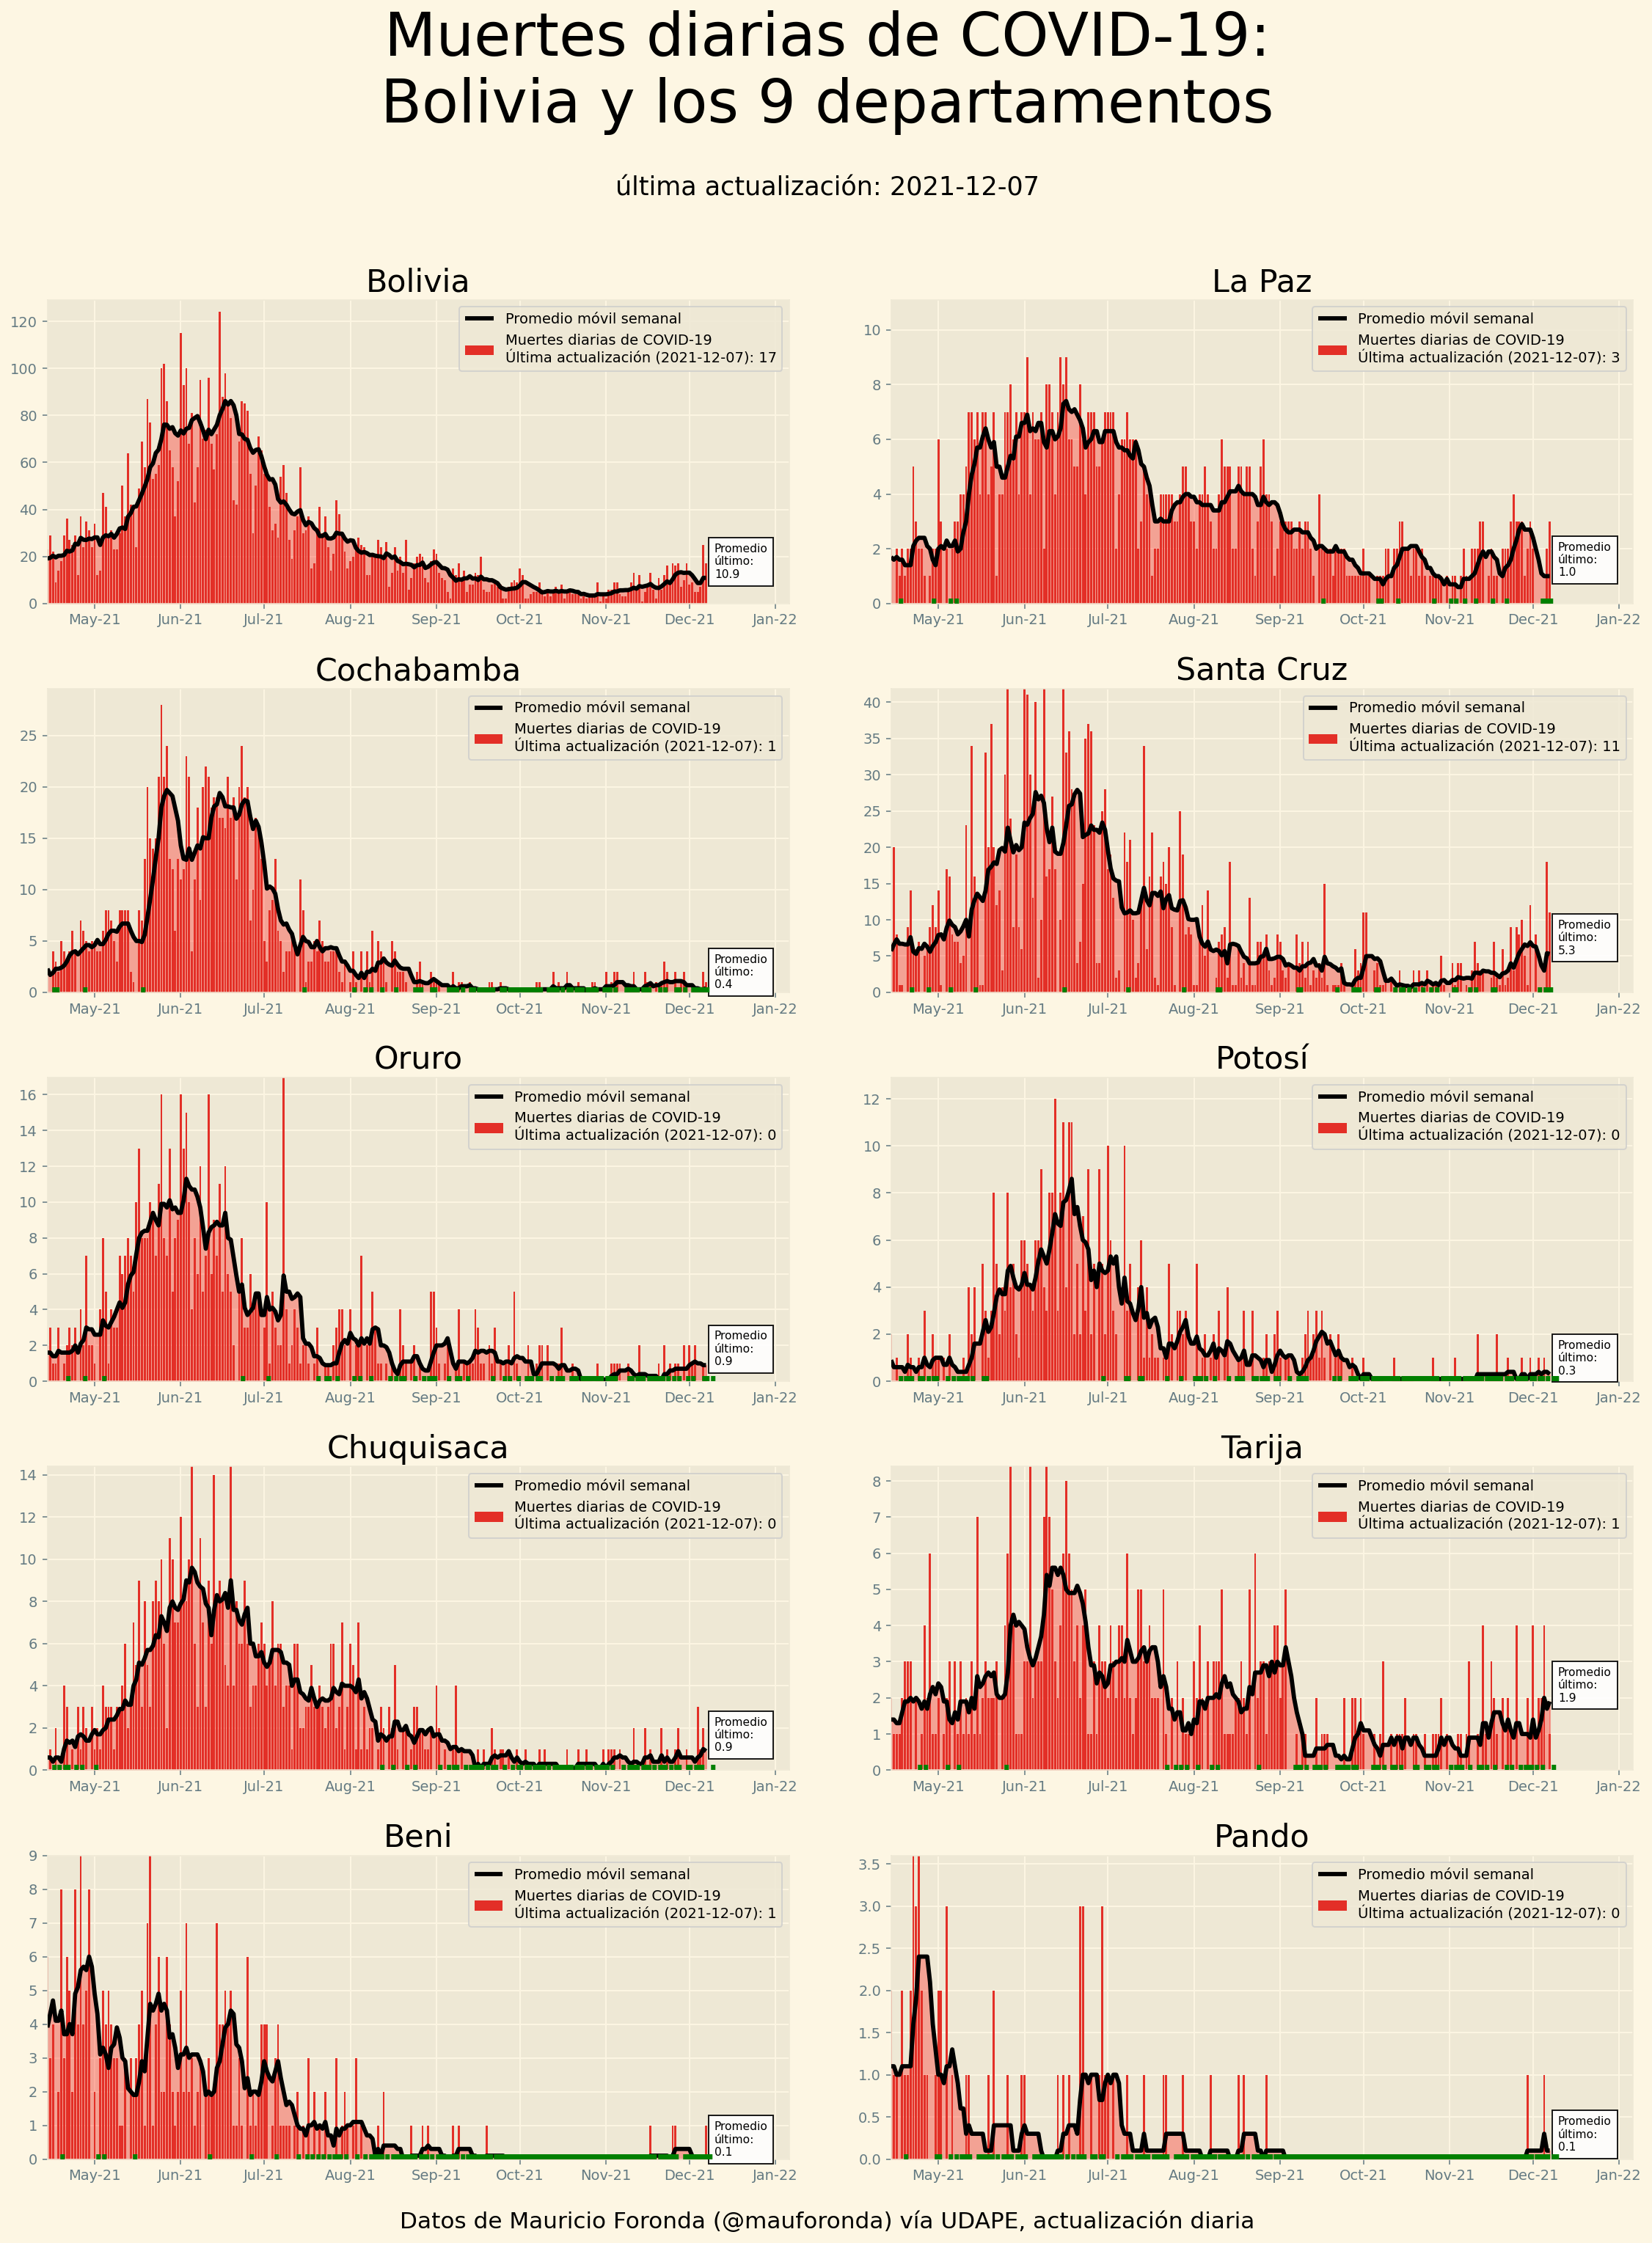

In [16]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)
axs = axs.flatten()

start_day = 400


fig.suptitle("Muertes diarias de COVID-19:\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(0.5, .97,"última actualización: {}".format(muertes_diarias.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.02,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=16)

for i in range(10):
    axs[i].grid(zorder=3)
    axs[i].bar(muertes_diarias.index[start_day:], muertes_diarias[muertes_diarias.columns[i]][start_day:], #color = "r", 
             label="Muertes diarias de COVID-19\nÚltima actualización ({}): {}".format(muertes_diarias.index[-1].date(),muertes_diarias.iloc[-1,i].astype(int)),
             width=.75 ,zorder=2,
             color=plt.get_cmap("Reds", 10)(range(6,7)))
    axs[i].set_title(muertes_diarias.columns[i], fontsize=22)
    axs[i].plot(muertes_diarias.index[start_day:], muertes_diarias7[muertes_diarias7.columns[i]][start_day:], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
    axs[i].fill_between(muertes_diarias.index[start_day:], muertes_diarias7[muertes_diarias7.columns[i]][start_day:], color = "red", zorder=1, alpha=.3)
    # axs[i].set_facecolor(background_color2)
    axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]][start_day:].max()*1.5)
    axs[i].set_xlim(muertes_diarias.index[start_day], muertes_diarias.index[-1] + datetime.timedelta(days=30))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


    axs[i].annotate( "Promedio\núltimo:\n" + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=3), muertes_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .9}
          )

    #if casos_diarios.iloc[:,i]==0:
    no_deaths_df= muertes_diarias[muertes_diarias.iloc[:,i]==0].iloc[:,i]
    for k in range(len(no_deaths_df)):
                 axs[i].annotate(text=".",
                     xy=(no_deaths_df.index[k], no_deaths_df[k]),
                     fontsize=30,
                     color="g",
                     label="0 muertes en este día")
    axs[i].legend()

fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

In [17]:
muertes_fig = fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [18]:
desc_y_sosp_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
desc_y_sosp_edu = desc_y_sosp_edu[desc_y_sosp_edu.columns].apply(pd.to_numeric, errors = "coerce")
desc_y_sosp_edu.index = pd.to_datetime(desc_y_sosp_edu.index)

desc_y_sosp_edu

La Paz  Unnamed: 2  Cochabamba  Unnamed: 4  Santa Cruz  \
Fecha                                                                
NaT            NaN         NaN         NaN         NaN         NaN   
2020-05-07    51.0      2294.0        25.0      1159.0         NaN   
2020-05-08    64.0      2399.0        29.0      1203.0         NaN   
2020-05-09    67.0      2515.0        29.0      1244.0         NaN   
2020-05-10    57.0      2578.0        29.0      1252.0         NaN   
...            ...         ...         ...         ...         ...   
2021-12-02     NaN    482173.0         NaN    428209.0         NaN   
2021-12-03     NaN    483513.0         NaN    429514.0         NaN   
2021-12-04     NaN    484837.0         NaN    430064.0         NaN   
2021-12-05     NaN    485608.0         NaN    430328.0         NaN   
2021-12-06     NaN    485880.0         NaN    431442.0         NaN   

            Unnamed: 6  Oruro  Unnamed: 8  Potosi  Unnamed: 10  Tarija  \
Fecha                                                                    
NaT                NaN    NaN         NaN     NaN          NaN     NaN   
2020-05-07      3444.0    2.0       465.0    20.0        156.0    15.0   
2020-05-08      3532.0    1.0       472.0    20.0        170.0    10.0   
2020-05-09      3638.0   15.0       475.0    33.0        186.0    10.0   
2020-05-10      3889.0    0.0       492.0     4.0        215.0    25.0   
...                ...    ...         ...     ...          ...     ...   
2021-12-02    901253.0    NaN     89232.0     NaN      65054.0     NaN   
2021-12-03    905084.0    NaN     89541.0     NaN      65108.0     NaN   
2021-12-04    907298.0    NaN     89893.0     NaN      65144.0     NaN   
2021-12-05    908488.0    NaN     90077.0     NaN      65218.0     NaN   
2021-12-06    911236.0    NaN     90145.0     NaN      65273.0     NaN   

            Unnamed: 12  Chuquisaca  Unnamed: 14   Beni  Unnamed: 16  Pando  \
Fecha                                                                         
NaT                 NaN         NaN          NaN    NaN          NaN    NaN   
2020-05-07         50.0        22.0        175.0  123.0        230.0   15.0   
2020-05-08         60.0        44.0        176.0    NaN        230.0   13.0   
2020-05-09         61.0         NaN          NaN    NaN        239.0    NaN   
2020-05-10         61.0        29.0        228.0  182.0        244.0    NaN   
...                 ...         ...          ...    ...          ...    ...   
2021-12-02     108262.0         NaN     106932.0    NaN      63729.0    NaN   
2021-12-03     108554.0         NaN     107181.0    NaN      63939.0    NaN   
2021-12-04     108730.0         NaN     107334.0    NaN      64023.0    NaN   
2021-12-05     108830.0         NaN     107439.0    NaN      64212.0    NaN   
2021-12-06     109202.0         NaN     107678.0    NaN      64276.0    NaN   

            Unnamed: 18  
Fecha                    
NaT                 NaN  
2020-05-07         76.0  
2020-05-08         79.0  
2020-05-09          NaN  
2020-05-10          NaN  
...                 ...  
2021-12-02      22788.0  
2021-12-03      22987.0  
2021-12-04      23013.0  
2021-12-05      23031.0  
2021-12-06      23126.0  

[580 rows x 18 columns]

In [19]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [47]:
descartados = desc_y_sosp_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9) #9=departamentos

descartados.to_csv(directory + "descartados_acumulados.csv")


# errores?
# descartados.at["2021-09-17 00:00:00", "Santa Cruz"] = np.nan #pd.datetime(2021,9,3)
# descartados.at["2021-07-20 00:00:00", "Potosí"] = np.nan #2021-07-20 00:00:00
# descartados.at["2021-07-15 00:00:00", "Chuquisaca"] = np.nan #2021-07-15 00:00:00
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan


#if previous value is the same, make nan
for i in ordenado:
    descartados.loc[descartados[i].shift(-1) == descartados[i]] = np.nan

descartados

La Paz  Cochabamba  Santa Cruz    Oruro   Potosí    Tarija  \
Fecha                                                                      
2020-05-07       NaN         NaN         NaN      NaN      NaN       NaN   
2020-05-08    2399.0      1203.0      3532.0    472.0    170.0      60.0   
2020-05-09       NaN         NaN         NaN      NaN      NaN       NaN   
2020-05-10    2578.0      1252.0      3889.0    492.0    215.0      61.0   
2020-05-11       NaN         NaN         NaN      NaN      NaN       NaN   
...              ...         ...         ...      ...      ...       ...   
2021-12-02  482173.0    428209.0    901253.0  89232.0  65054.0  108262.0   
2021-12-03  483513.0    429514.0    905084.0  89541.0  65108.0  108554.0   
2021-12-04  484837.0    430064.0    907298.0  89893.0  65144.0  108730.0   
2021-12-05  485608.0    430328.0    908488.0  90077.0  65218.0  108830.0   
2021-12-06  485880.0    431442.0    911236.0  90145.0  65273.0  109202.0   

            Chuquisaca     Beni    Pando    Bolivia  
Fecha                                                
2020-05-07         NaN      NaN      NaN        NaN  
2020-05-08       176.0    230.0     79.0     8321.0  
2020-05-09         NaN      NaN      NaN        NaN  
2020-05-10       228.0    244.0      NaN        NaN  
2020-05-11         NaN      NaN      NaN        NaN  
...                ...      ...      ...        ...  
2021-12-02    106932.0  63729.0  22788.0  2267632.0  
2021-12-03    107181.0  63939.0  22987.0  2275421.0  
2021-12-04    107334.0  64023.0  23013.0  2280336.0  
2021-12-05    107439.0  64212.0  23031.0  2283231.0  
2021-12-06    107678.0  64276.0  23126.0  2288258.0  

[579 rows x 10 columns]

In [48]:
############################## No hay sospechosos desde mediados del 2021

# sospechosos = desc_y_sosp_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
# #for i in range(9):
# #    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
# sospechosos["Bolivia"] = sospechosos.sum(axis=1)
# sospechosos.tail(118)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

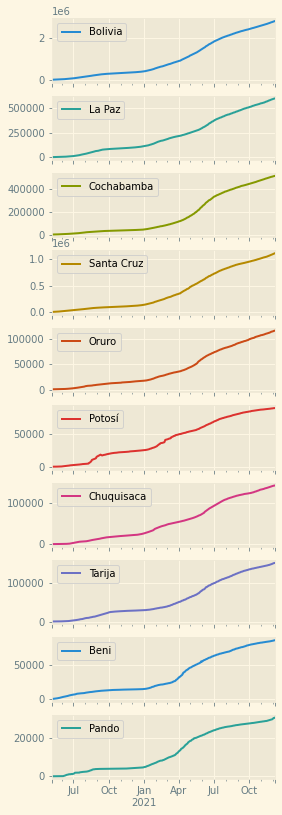

In [54]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).round(0)
pruebas_acum = pruebas_acum.interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum.plot(subplots=True, figsize=(4,14))
# pruebas_acum

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2021-12-02   8451.0  1719.0      1307.0      3863.0  349.0    92.0   
2021-12-03   9009.0  1495.0      1469.0      4457.0  329.0    71.0   
2021-12-04   5685.0  1466.0       615.0      2625.0  386.0    54.0   
2021-12-05   3426.0   854.0       292.0      1500.0  201.0    75.0   
2021-12-06   6303.0   306.0      1241.0      3605.0   73.0    65.0   

            Chuquisaca  Tarija   Beni  Pando  
2021-12-02       338.0   464.0  165.0  154.0  
2021-12-03       293.0   438.0  217.0  240.0  
2021-12-04       181.0   229.0   89.0   40.0  
2021-12-05       136.0   139.0  199.0   30.0  
2021-12-06       271.0   546.0   73.0  123.0

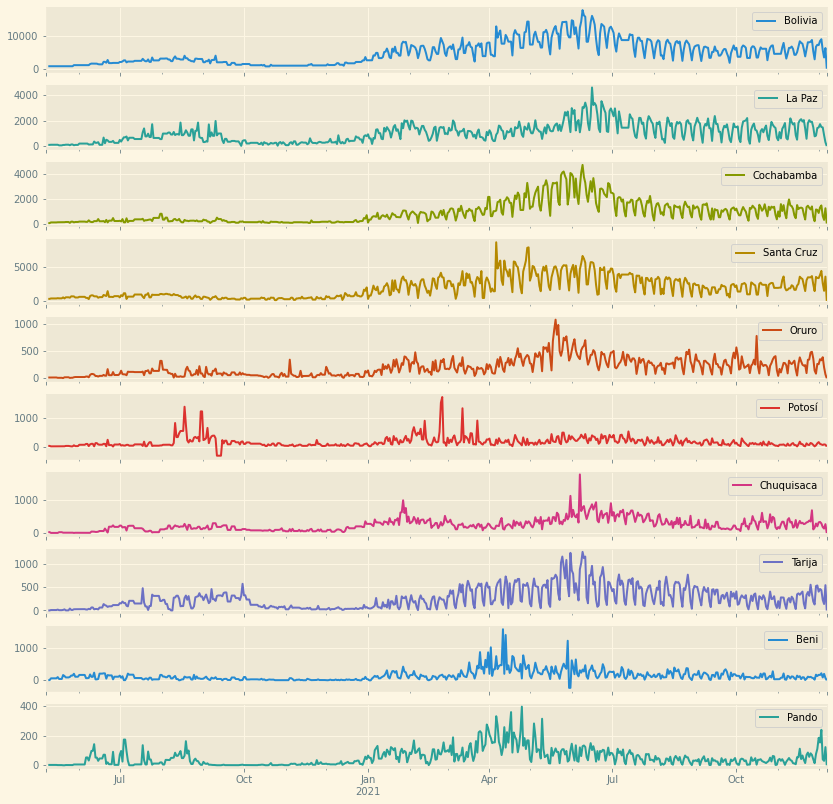

In [57]:
pruebas_diarias = pruebas_acum.diff()
pruebas_diarias.plot(subplots=True, figsize=(14,14),
                     # ylim=(-1000,0)
                    )
# plt.ylim(0,-1000)

pruebas_diarias = pruebas_diarias[pruebas_diarias.Bolivia>0]
pruebas_diarias.tail()

In [58]:
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

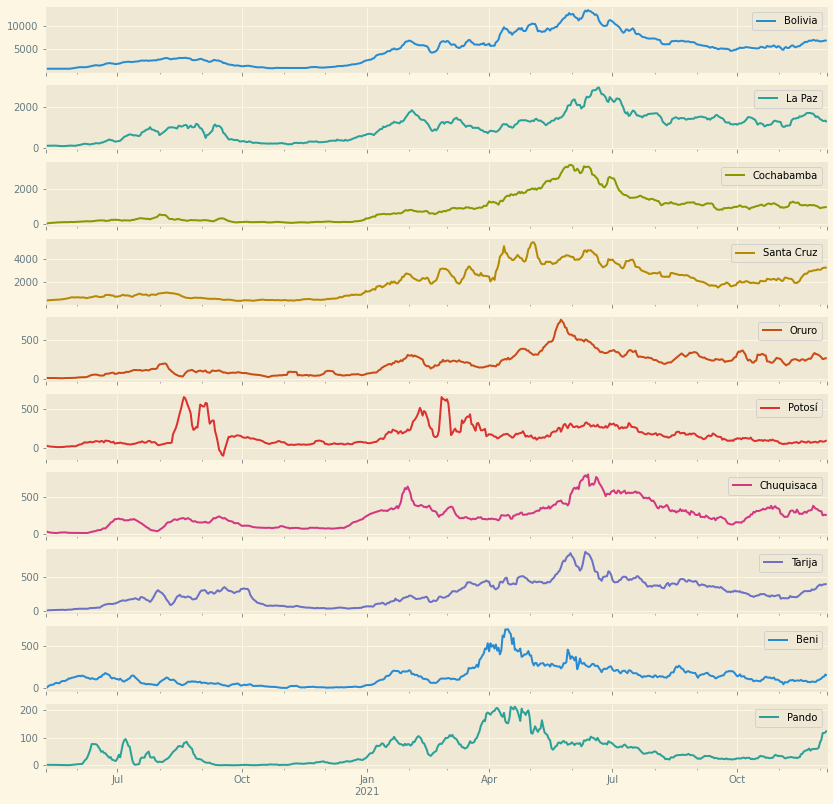

In [59]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7.plot(subplots=True, figsize=(14,14))

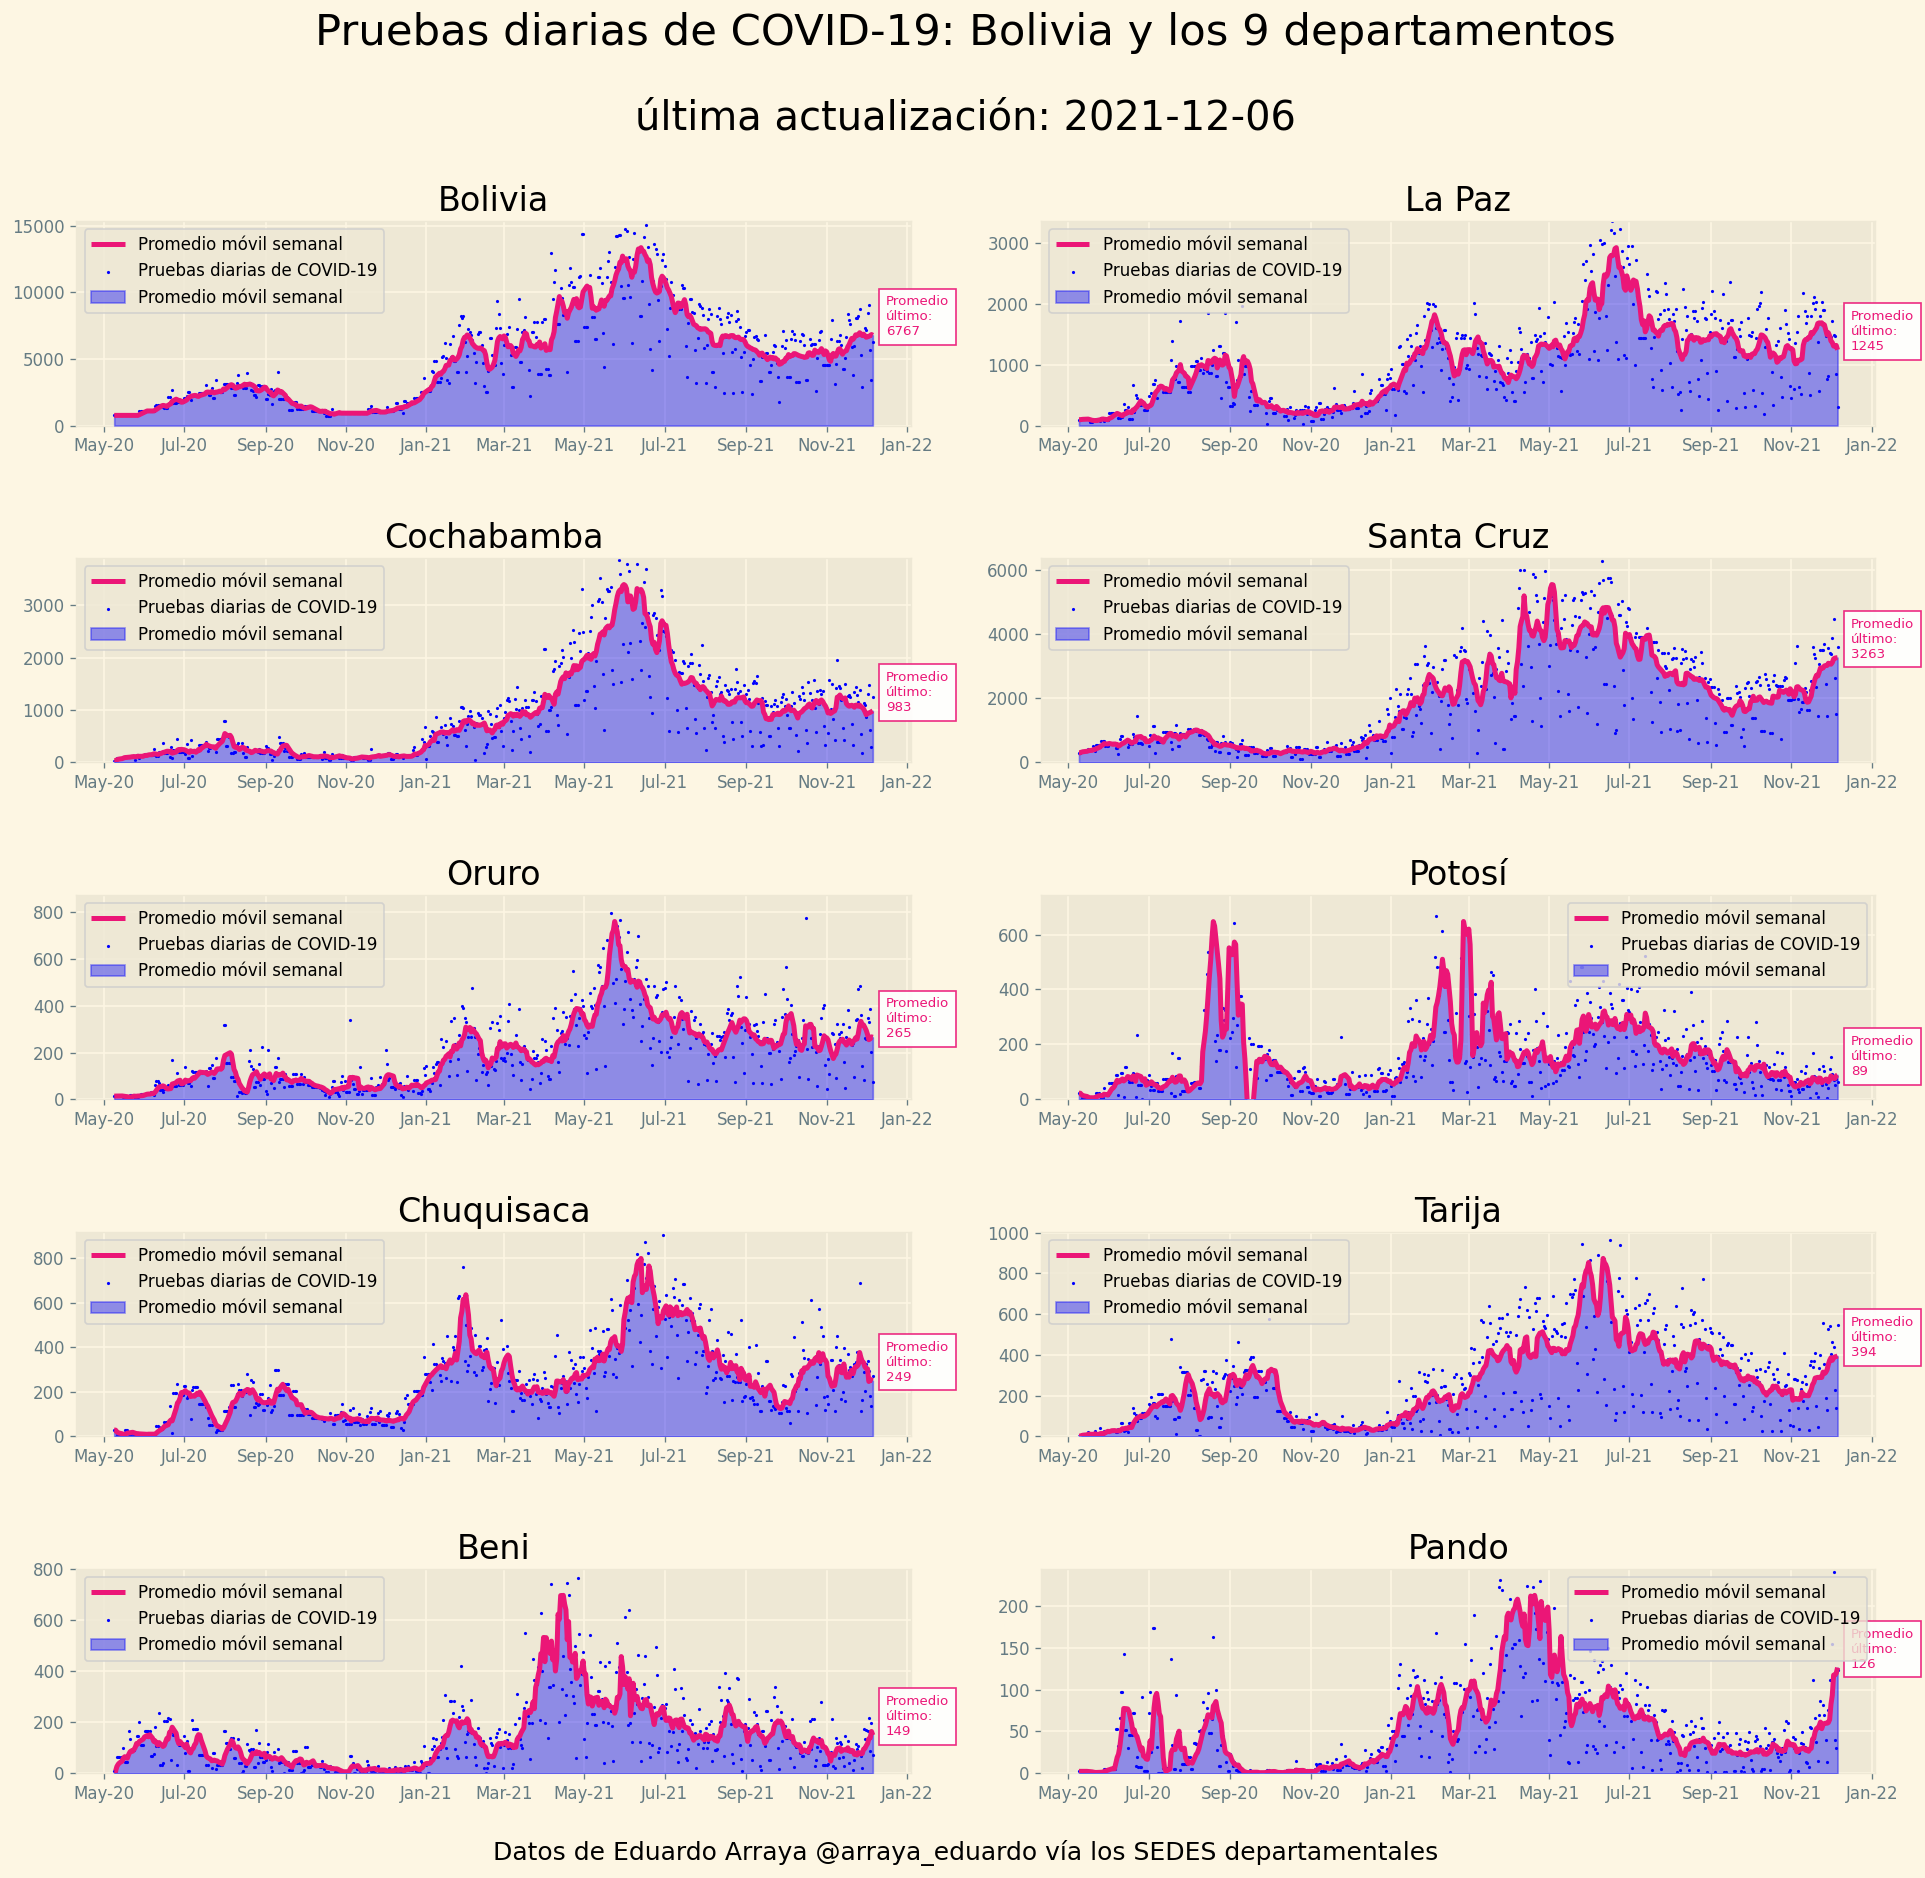

In [65]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=120)
axs = axs.flatten()

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 26, y=1.07)
fig.text(0.5,-.03,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=15, ha="center")
fig.text(0.5, 1.0,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=24, ha="center")

for i in range(10):
    axs[i].grid(zorder=1)
    axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
    # axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
    axs[i].scatter(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",s=.8,zorder=2)
    axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=3)
    axs[i].fill_between(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "b", label="Promedio móvil semanal", zorder=3, alpha=.4)
    # axs[i].set_facecolor(background_color2)
    axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
    axs[i].legend()
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

    axs[i].annotate( "Promedio\núltimo:\n" + str(pruebas_diarias7.iloc[-1,i].astype(int)),
      xy = (pruebas_diarias7.index[-1] + datetime.timedelta(days=10), pruebas_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "#EB1677",
      bbox={
              'edgecolor': "#EB1677",
              'facecolor': 'w', 
              'alpha': .9}
          )


fig.tight_layout(pad=0.4, w_pad=2, h_pad=4)

fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

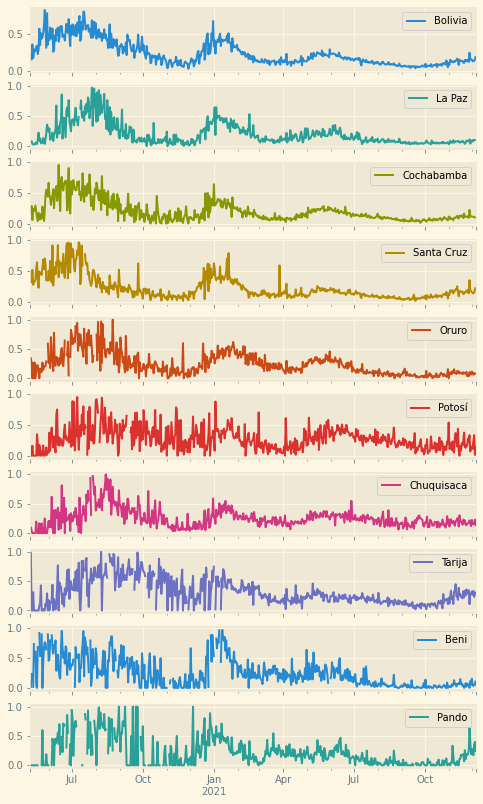

In [72]:
positividad_diaria_raw = casos_diarios / pruebas_diarias#.rolling(5).mean()


positividad_diaria_raw[positividad_diaria_raw>1] = np.nan
positividad_diaria_raw[positividad_diaria_raw<0] = np.nan


# positividad_diaria_raw = casos_diarios / pruebas_diarias#.rolling(5).mean()

positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])

positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw.plot(subplots=True, figsize=(8,14))


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

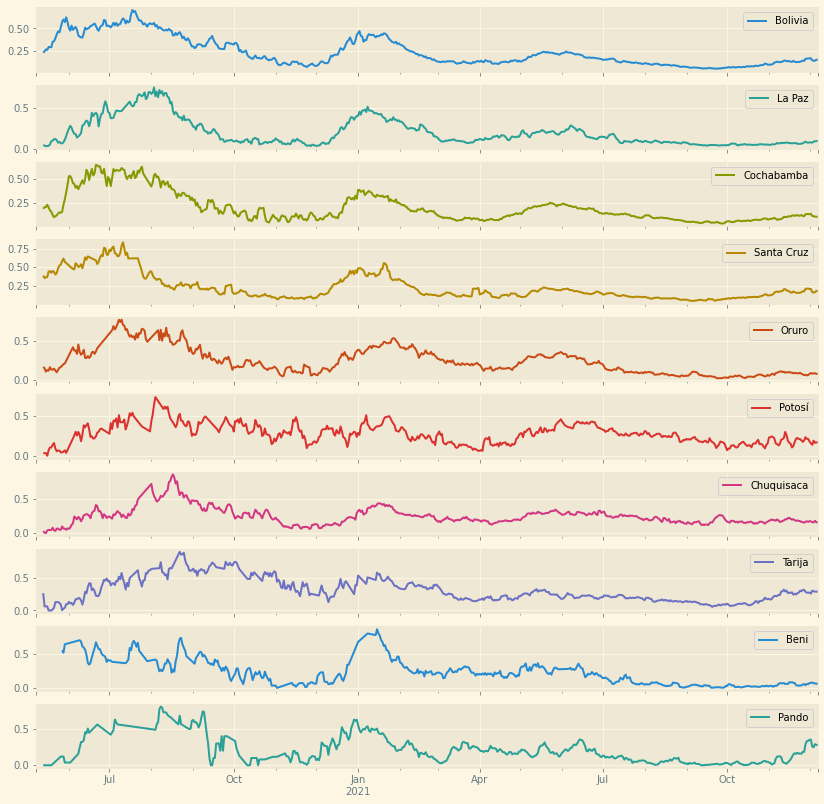

In [30]:
positividad_diaria_adj = positividad_diaria_raw.rolling(5).mean() #,min_periods=1

positividad_diaria_adj = positividad_diaria_adj.interpolate()

positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj.plot(subplots=True, figsize=(14,14))

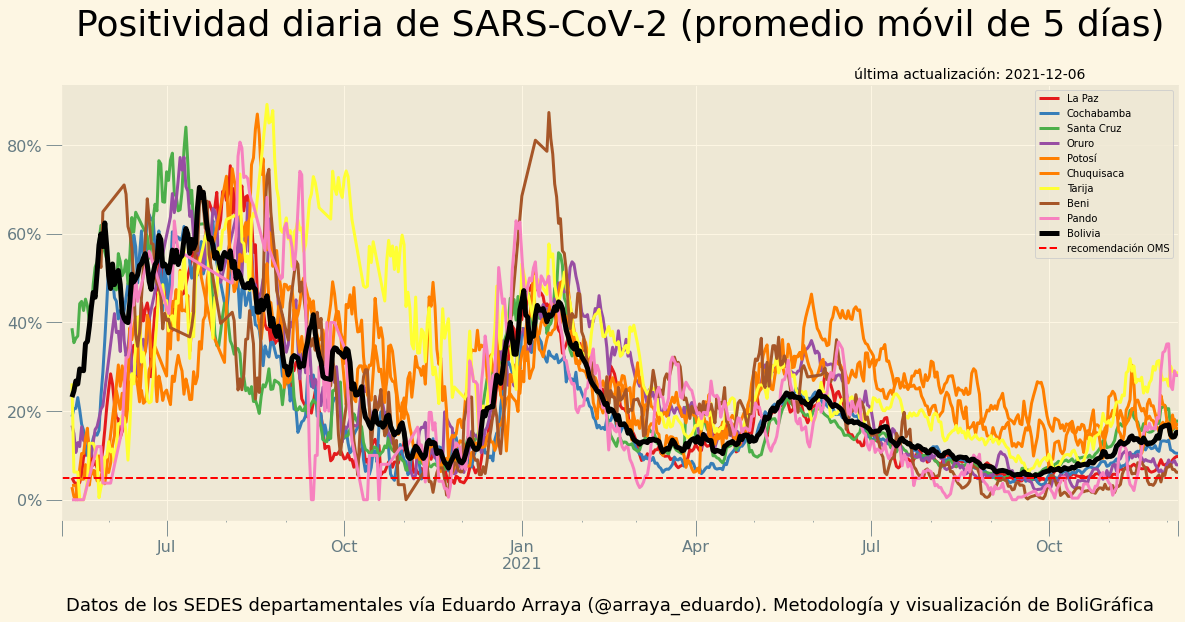

In [107]:
ax = positividad_diaria_adj.iloc[:,1:].plot(figsize = (20,8),zorder=2, linewidth=3, color= cm.get_cmap("Set1",12)(range(1,12)))
plt.plot(positividad_diaria_adj.index, positividad_diaria_adj.Bolivia, color="black", linewidth=5, label="Bolivia")

plt.grid(zorder=1)
plt.title("Positividad diaria de SARS‑CoV‑2 (promedio móvil de 5 días)", fontsize =36, y=1.1)

plt.text(18392,-.25,"Datos de los SEDES departamentales vía Eduardo Arraya (@arraya_eduardo). Metodología y visualización de BoliGráfica", fontsize=18)
plt.text(18800, .95,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax.tick_params(size=16)
ax.axhline(y = .05, color="r", linestyle="dashed", label= "recomendación OMS")
ax.legend()
plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", bbox_inches="tight", dpi=120)

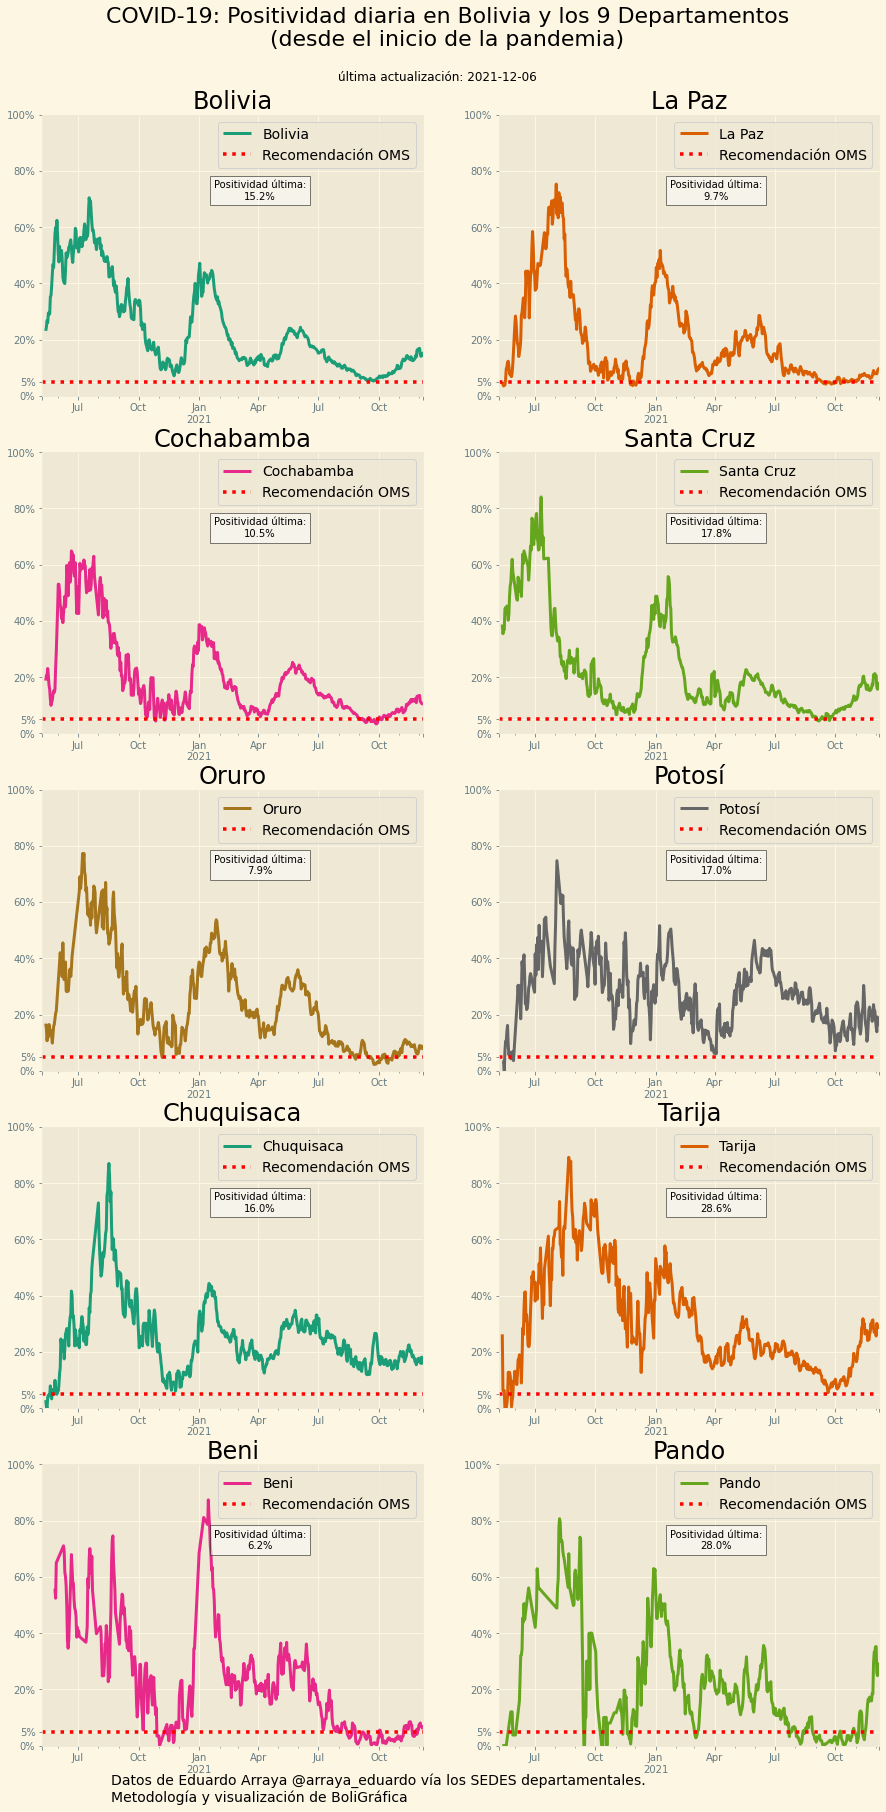

In [111]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3, 
                                                color=cm.get_cmap("Dark2",6)(range(6)))

axs[0][0].get_figure().suptitle('COVID-19: Positividad diaria en Bolivia y los 9 Departamentos\n(desde el inicio de la pandemia)', y=.93, fontsize = 22)
axs = axs.flatten()

for i in range(10):
    axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
    axs[i].set_ylim(0,1)
    axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
    axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
    axs[i].legend(fontsize = 14)
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    axs[i].text(18720,.7, "Positividad última:\n{}%".format((positividad_diaria_adj.iloc[-1,i]*100).round(1)), ha="center",
              bbox={
              'edgecolor': "black",
              'facecolor': 'w', 
              'alpha': .5}
          )


plt.text(17800, -.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales.\nMetodología y visualización de BoliGráfica", fontsize=14)
plt.text(18145, 5.92,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=12)
plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", bbox_inches="tight", dpi=120)

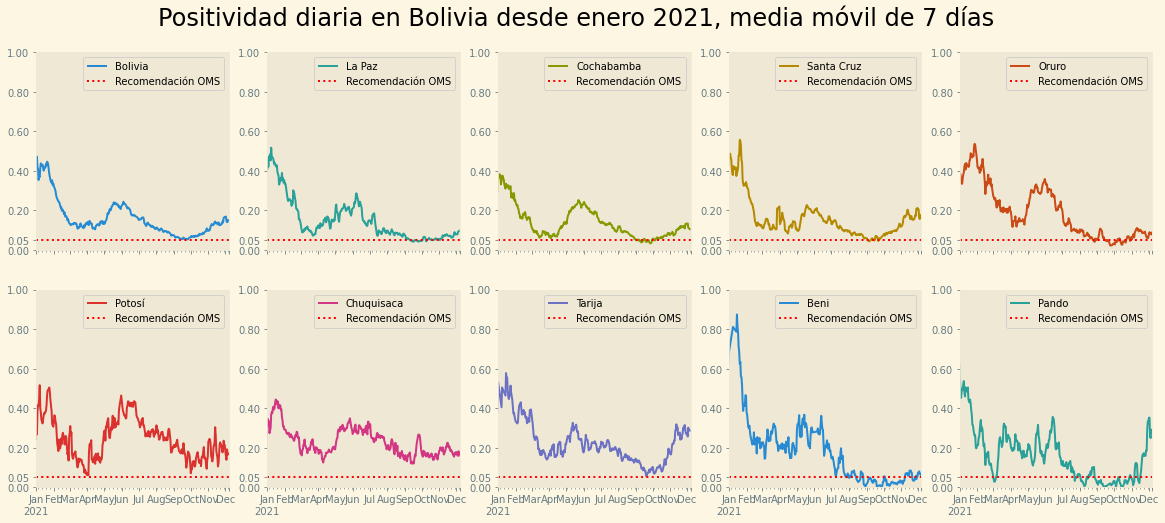

In [113]:
#starts 2021

axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
axs = axs.flatten()

for i in range(10):
    axs[i].grid()
    axs[i].set_ylim(0,1)
    axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
    axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
    axs[i].legend()
    axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])


plt.savefig(directory + "positividad_2021.jpg")

# MIX

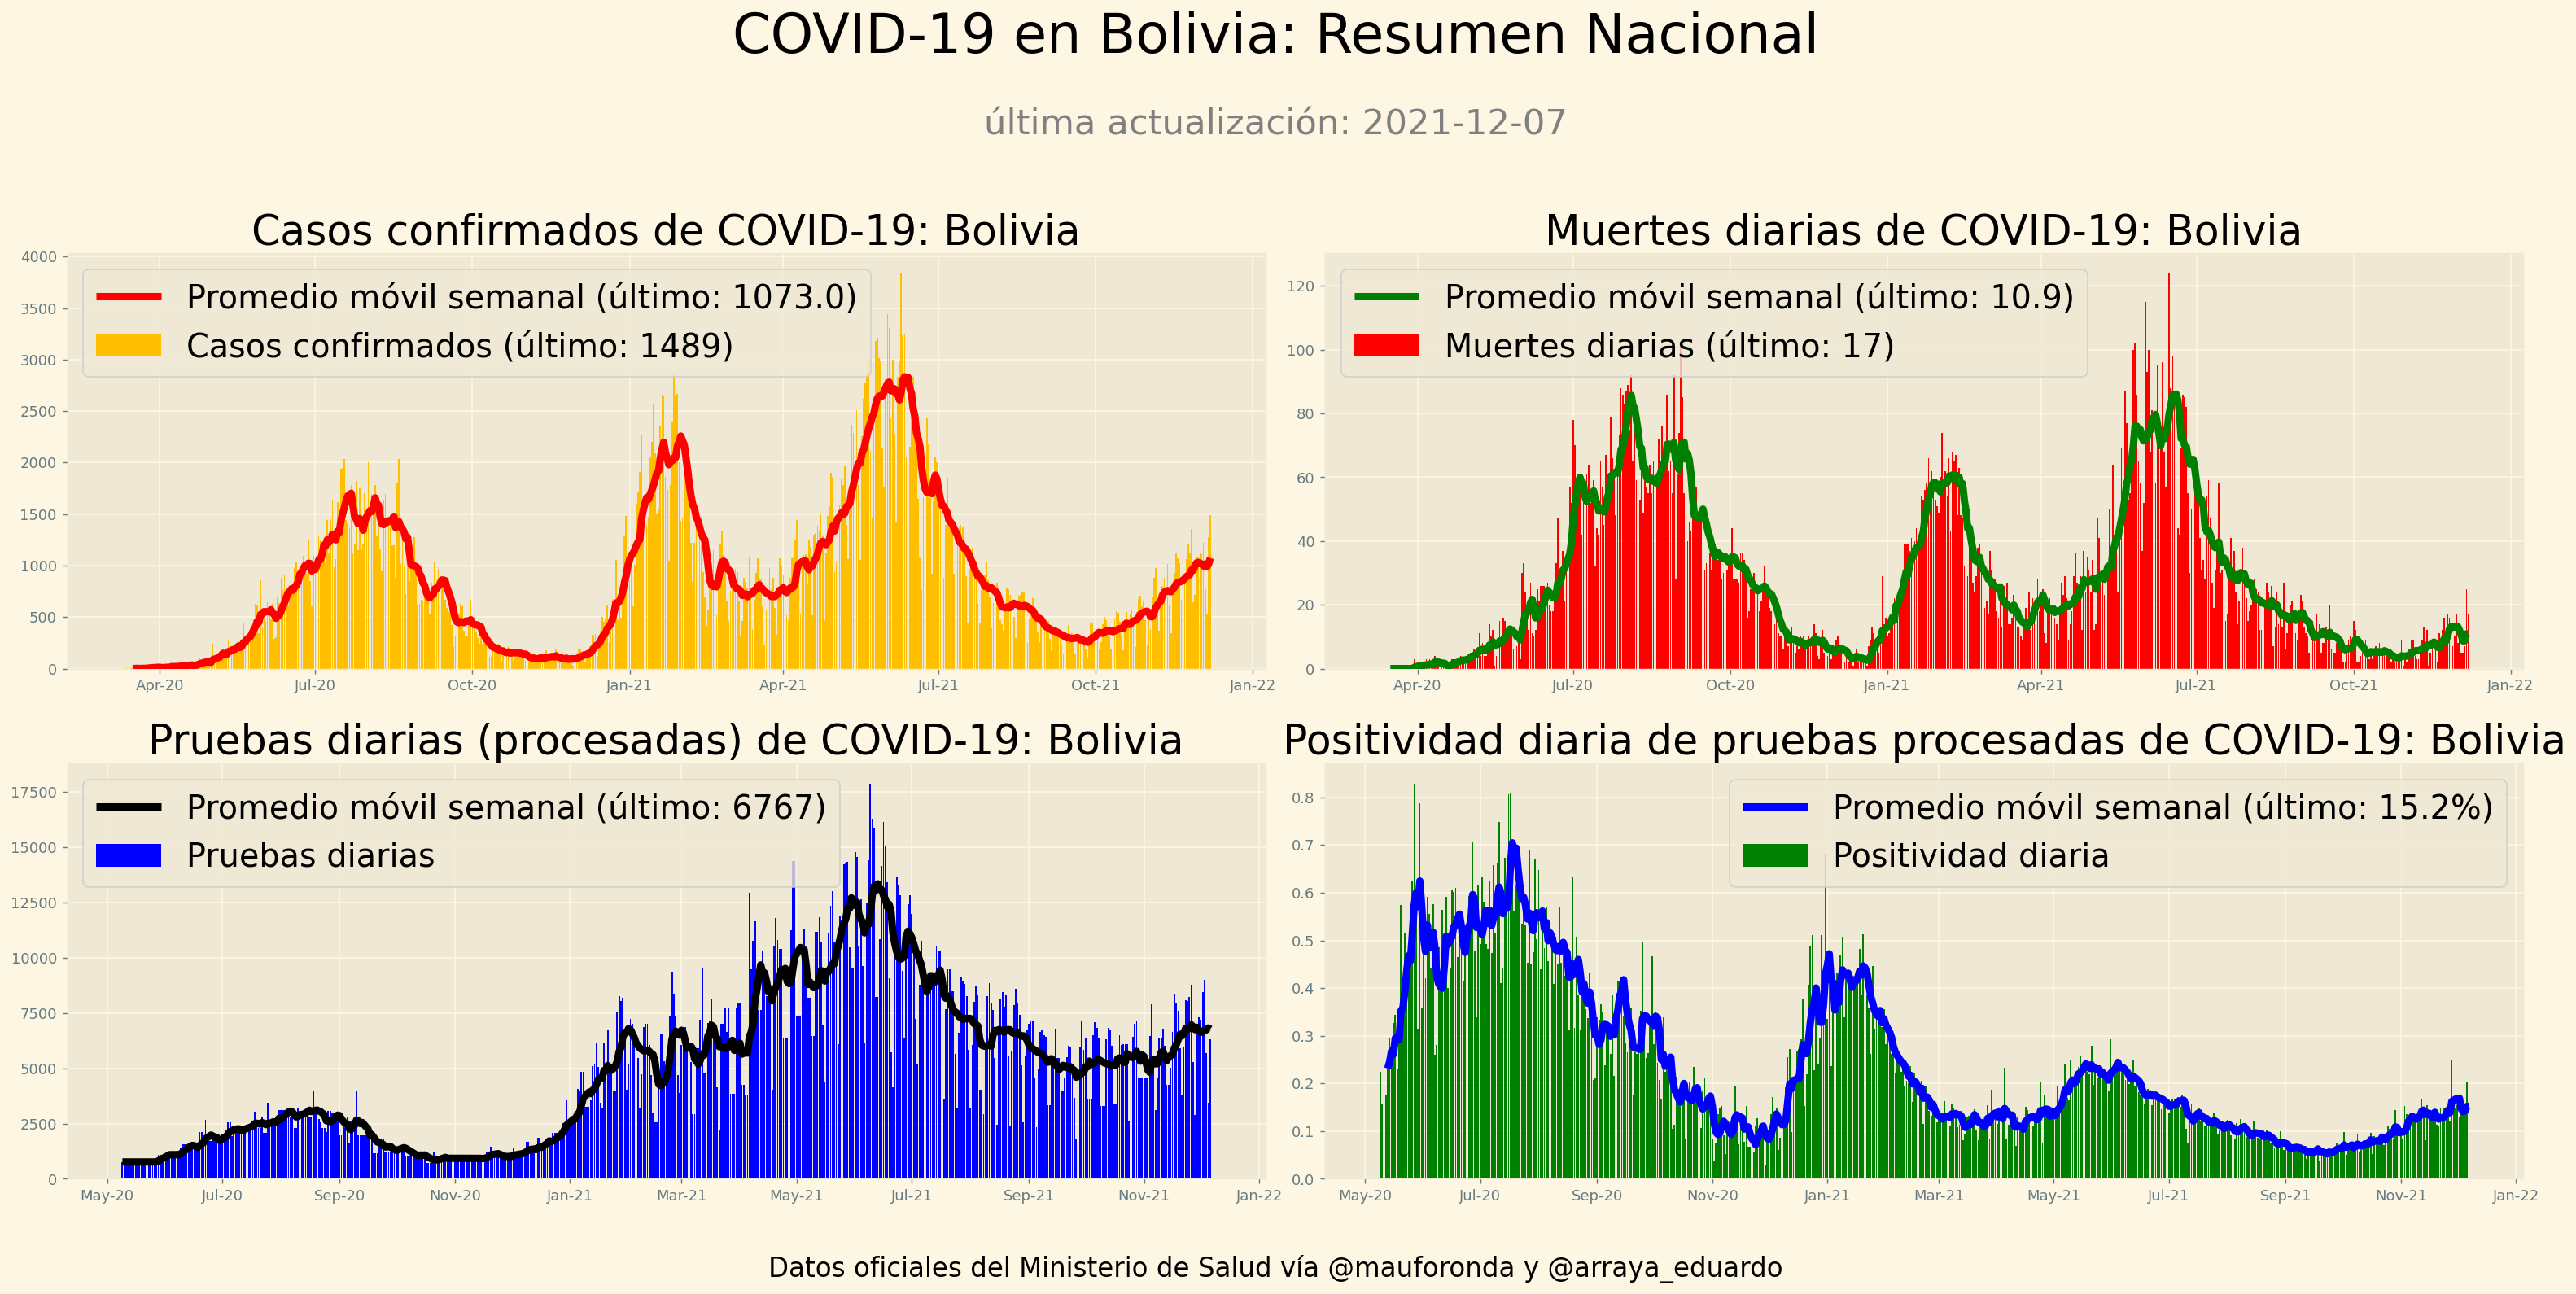

In [124]:
fig, axs = plt.subplots(2,2, figsize = (24,10), dpi=130)
axs = axs.flatten()

fig.suptitle("COVID-19 en Bolivia: Resumen Nacional", fontsize= 37, y=1.132)
fig.text(0.5,-.065,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=18, ha="center")
fig.text(.5, 1.015,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=24, ha="center", color="gray")

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=28) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados (último: {})".format(casos_diarios.Bolivia.iloc[-1].astype(int)),width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3, linewidth=5)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend(fontsize=22)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=28) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias (último: {})".format(muertes_diarias.Bolivia.iloc[-1]),width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3, linewidth=5)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend(fontsize=22)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=28) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias", width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3, linewidth=5)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].legend(fontsize=22)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=28) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3, linewidth=5)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend(fontsize=22)
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (24,10), dpi=130)
axs = axs.flatten()

fig.suptitle("COVID-19 en Bolivia: Resumen Nacional", fontsize= 32, y=1.132)
fig.text(0.5,-.065,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=18, ha="center")
fig.text(.5, 1.015,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=20, ha="center", color="gray")

# axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3, linewidth=5)
# axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3, linewidth=5)
# axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3, linewidth=5)
# axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3, linewidth=5)

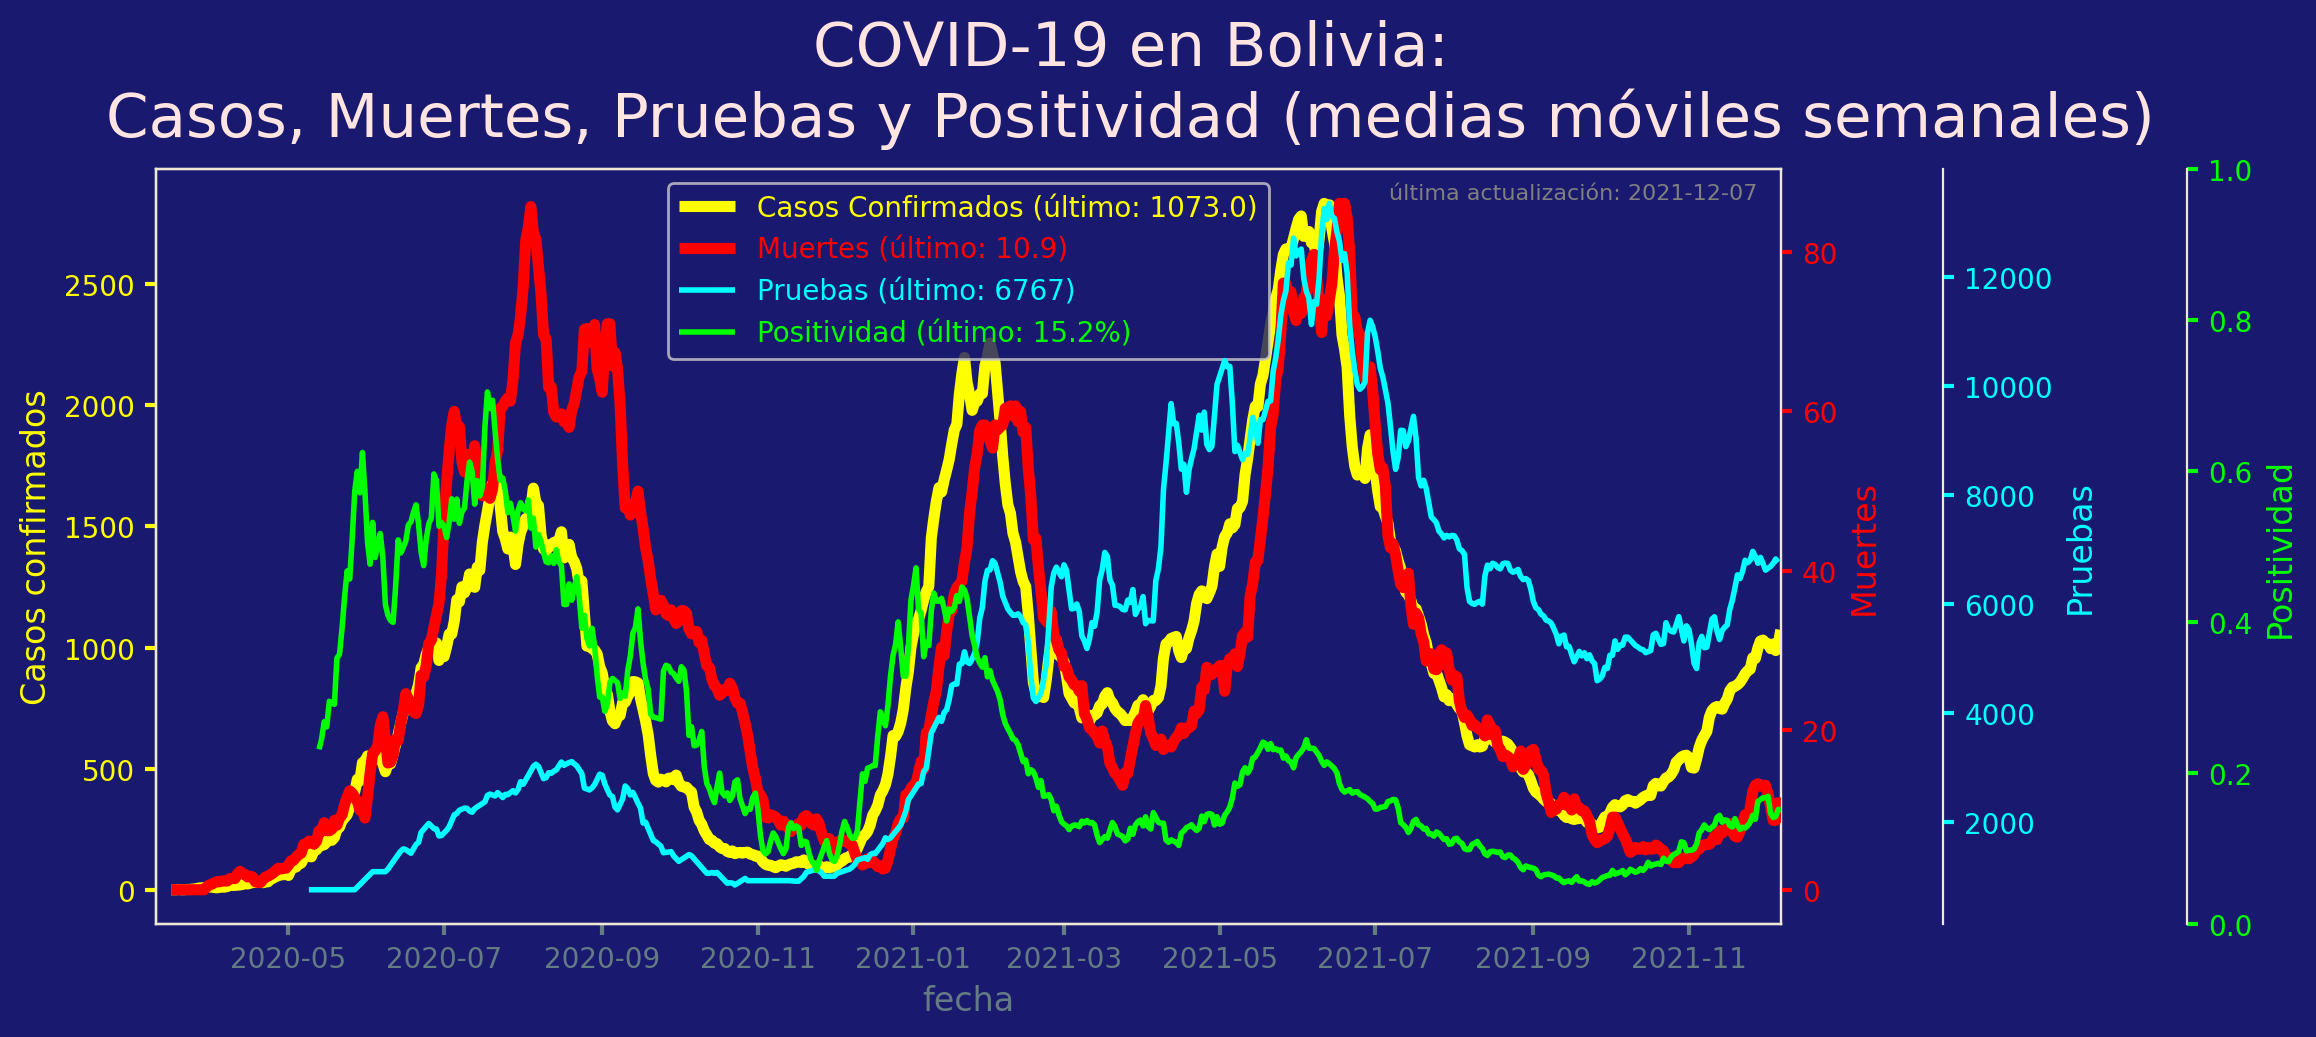

In [190]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize=(13,5), dpi=200)
fig.suptitle("COVID-19 en Bolivia:\nCasos, Muertes, Pruebas y Positividad (medias móviles semanales)", fontsize=22,y=1.03, color="mistyrose")
fig.text(.67, .85,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8, ha="center", color="gray")
fig.subplots_adjust(right=0.75)
fig.set_facecolor("midnightblue")
host.set_facecolor("midnightblue")

host=host
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()


# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["right"].set_position(("axes", 1.25))

# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)

# Show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["right"].set_visible(True)

#plot lines in their own axs
p1, = host.plot(casos_diarios.index, casos_diarios7.Bolivia, color = "yellow", label="Casos Confirmados (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3, linewidth=4)
p2, = par1.plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "r", label="Muertes (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3, linewidth=4)
p3, = par2.plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "cyan", label="Pruebas (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3, linewidth=2)
p4, = par3.plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "lime", label="Positividad (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3, linewidth=2)


#x and y lims
host.set_xlim(casos_diarios.index[0], casos_diarios.index[-1])
# host.set_ylim(0, 3000)
# par1.set_ylim(0, 100)
# par2.set_ylim(1, 13000)
par3.set_ylim(0,1)

host.set_xlabel("fecha")
host.set_ylabel("Casos confirmados")
par1.set_ylabel("Muertes")
par2.set_ylabel("Pruebas")
par3.set_ylabel("Positividad")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())


tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

host.grid(False)
par1.grid(False)
par2.grid(False)
par3.grid(False)

lines = [p1, p2, p3, p4]
host.legend(lines, [l.get_label() for l in lines], facecolor="midnightblue", labelcolor="linecolor", loc="upper center")

plt.show()
fig.savefig("graficas/resumen_nacional_normalizado.jpg")

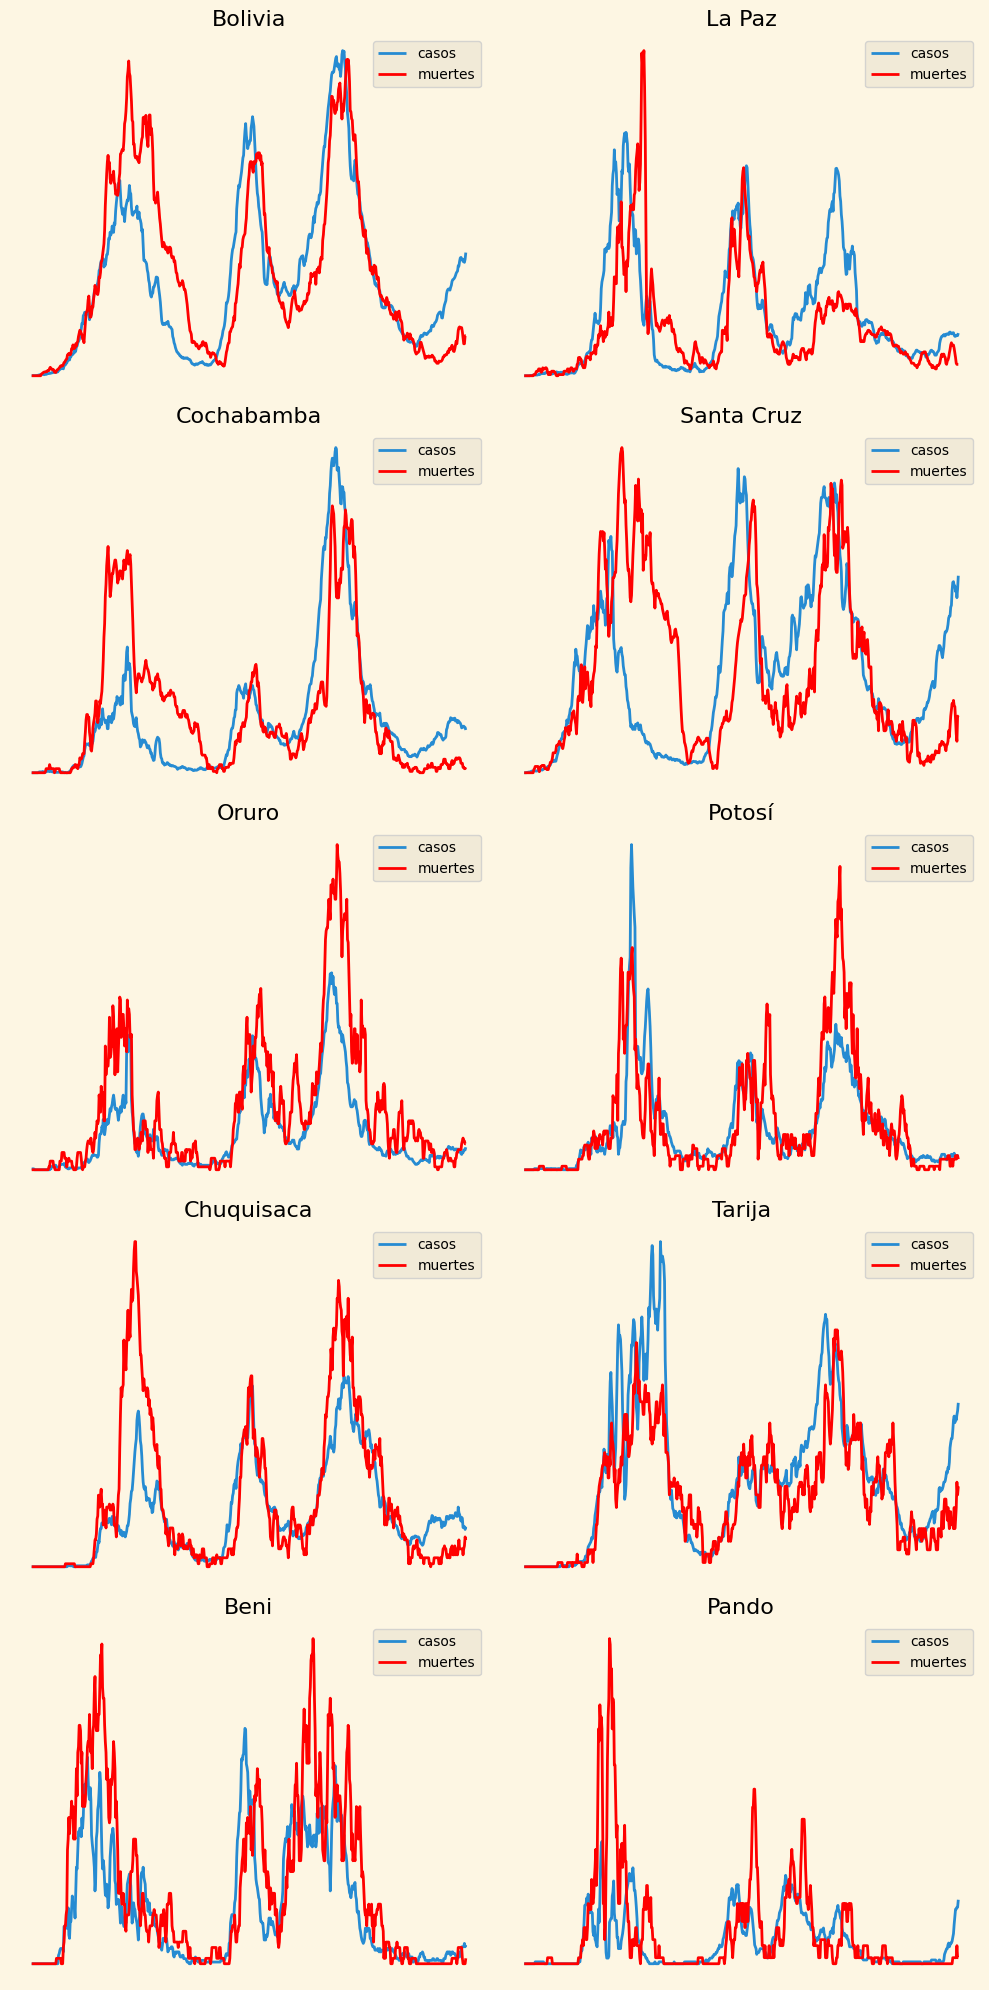

In [236]:
fig, axs = plt.subplots(5,2,figsize=(10,20), dpi=100)
axs = axs.flatten()
# axs2 = axs2.flatten()

# for i in range(10):
#     axs2 = axs[i].twinx()

for i in range(10):
    axs[i].set_title(casos_diarios7.columns[i])
    axs[i].plot(casos_diarios7.index, casos_diarios7[casos_diarios7.columns[i]], label="casos")
    axs[i].plot(muertes_diarias7.index, muertes_diarias7[muertes_diarias7.columns[i]]*32, color="r", label="muertes")
    axs[i].axis("off")
    axs[i].legend()
    
fig.tight_layout()
fig.savefig("graficas/casos_muertes_normalizado_dept.jpg")

# ACTIVOS


In [237]:
activos = casos_diarios.rolling(14).sum()      #-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos.to_csv(directory + "activos.csv")
activos

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-11      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-12      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-13      NaN     NaN         NaN         NaN    NaN     NaN   
2020-03-14      NaN     NaN         NaN         NaN    NaN     NaN   
...             ...     ...         ...         ...    ...     ...   
2021-12-03  13682.0  1625.0      1614.0      7409.0  291.0   171.0   
2021-12-04  13784.0  1620.0      1614.0      7516.0  301.0   183.0   
2021-12-05  13904.0  1626.0      1589.0      7628.0  298.0   181.0   
2021-12-06  14297.0  1638.0      1569.0      7996.0  295.0   176.0   
2021-12-07  14727.0  1687.0      1496.0      8293.0  305.0   185.0   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10         NaN     NaN    NaN    NaN  
2020-03-11         NaN     NaN    NaN    NaN  
2020-03-12         NaN     NaN    NaN    NaN  
2020-03-13         NaN     NaN    NaN    NaN  
2020-03-14         NaN     NaN    NaN    NaN  
...                ...     ...    ...    ...  
2021-12-03       743.0  1453.0  100.0  276.0  
2021-12-04       709.0  1457.0  101.0  283.0  
2021-12-05       691.0  1486.0  111.0  294.0  
2021-12-06       653.0  1547.0  119.0  304.0  
2021-12-07       649.0  1645.0  123.0  344.0  

[638 rows x 10 columns]

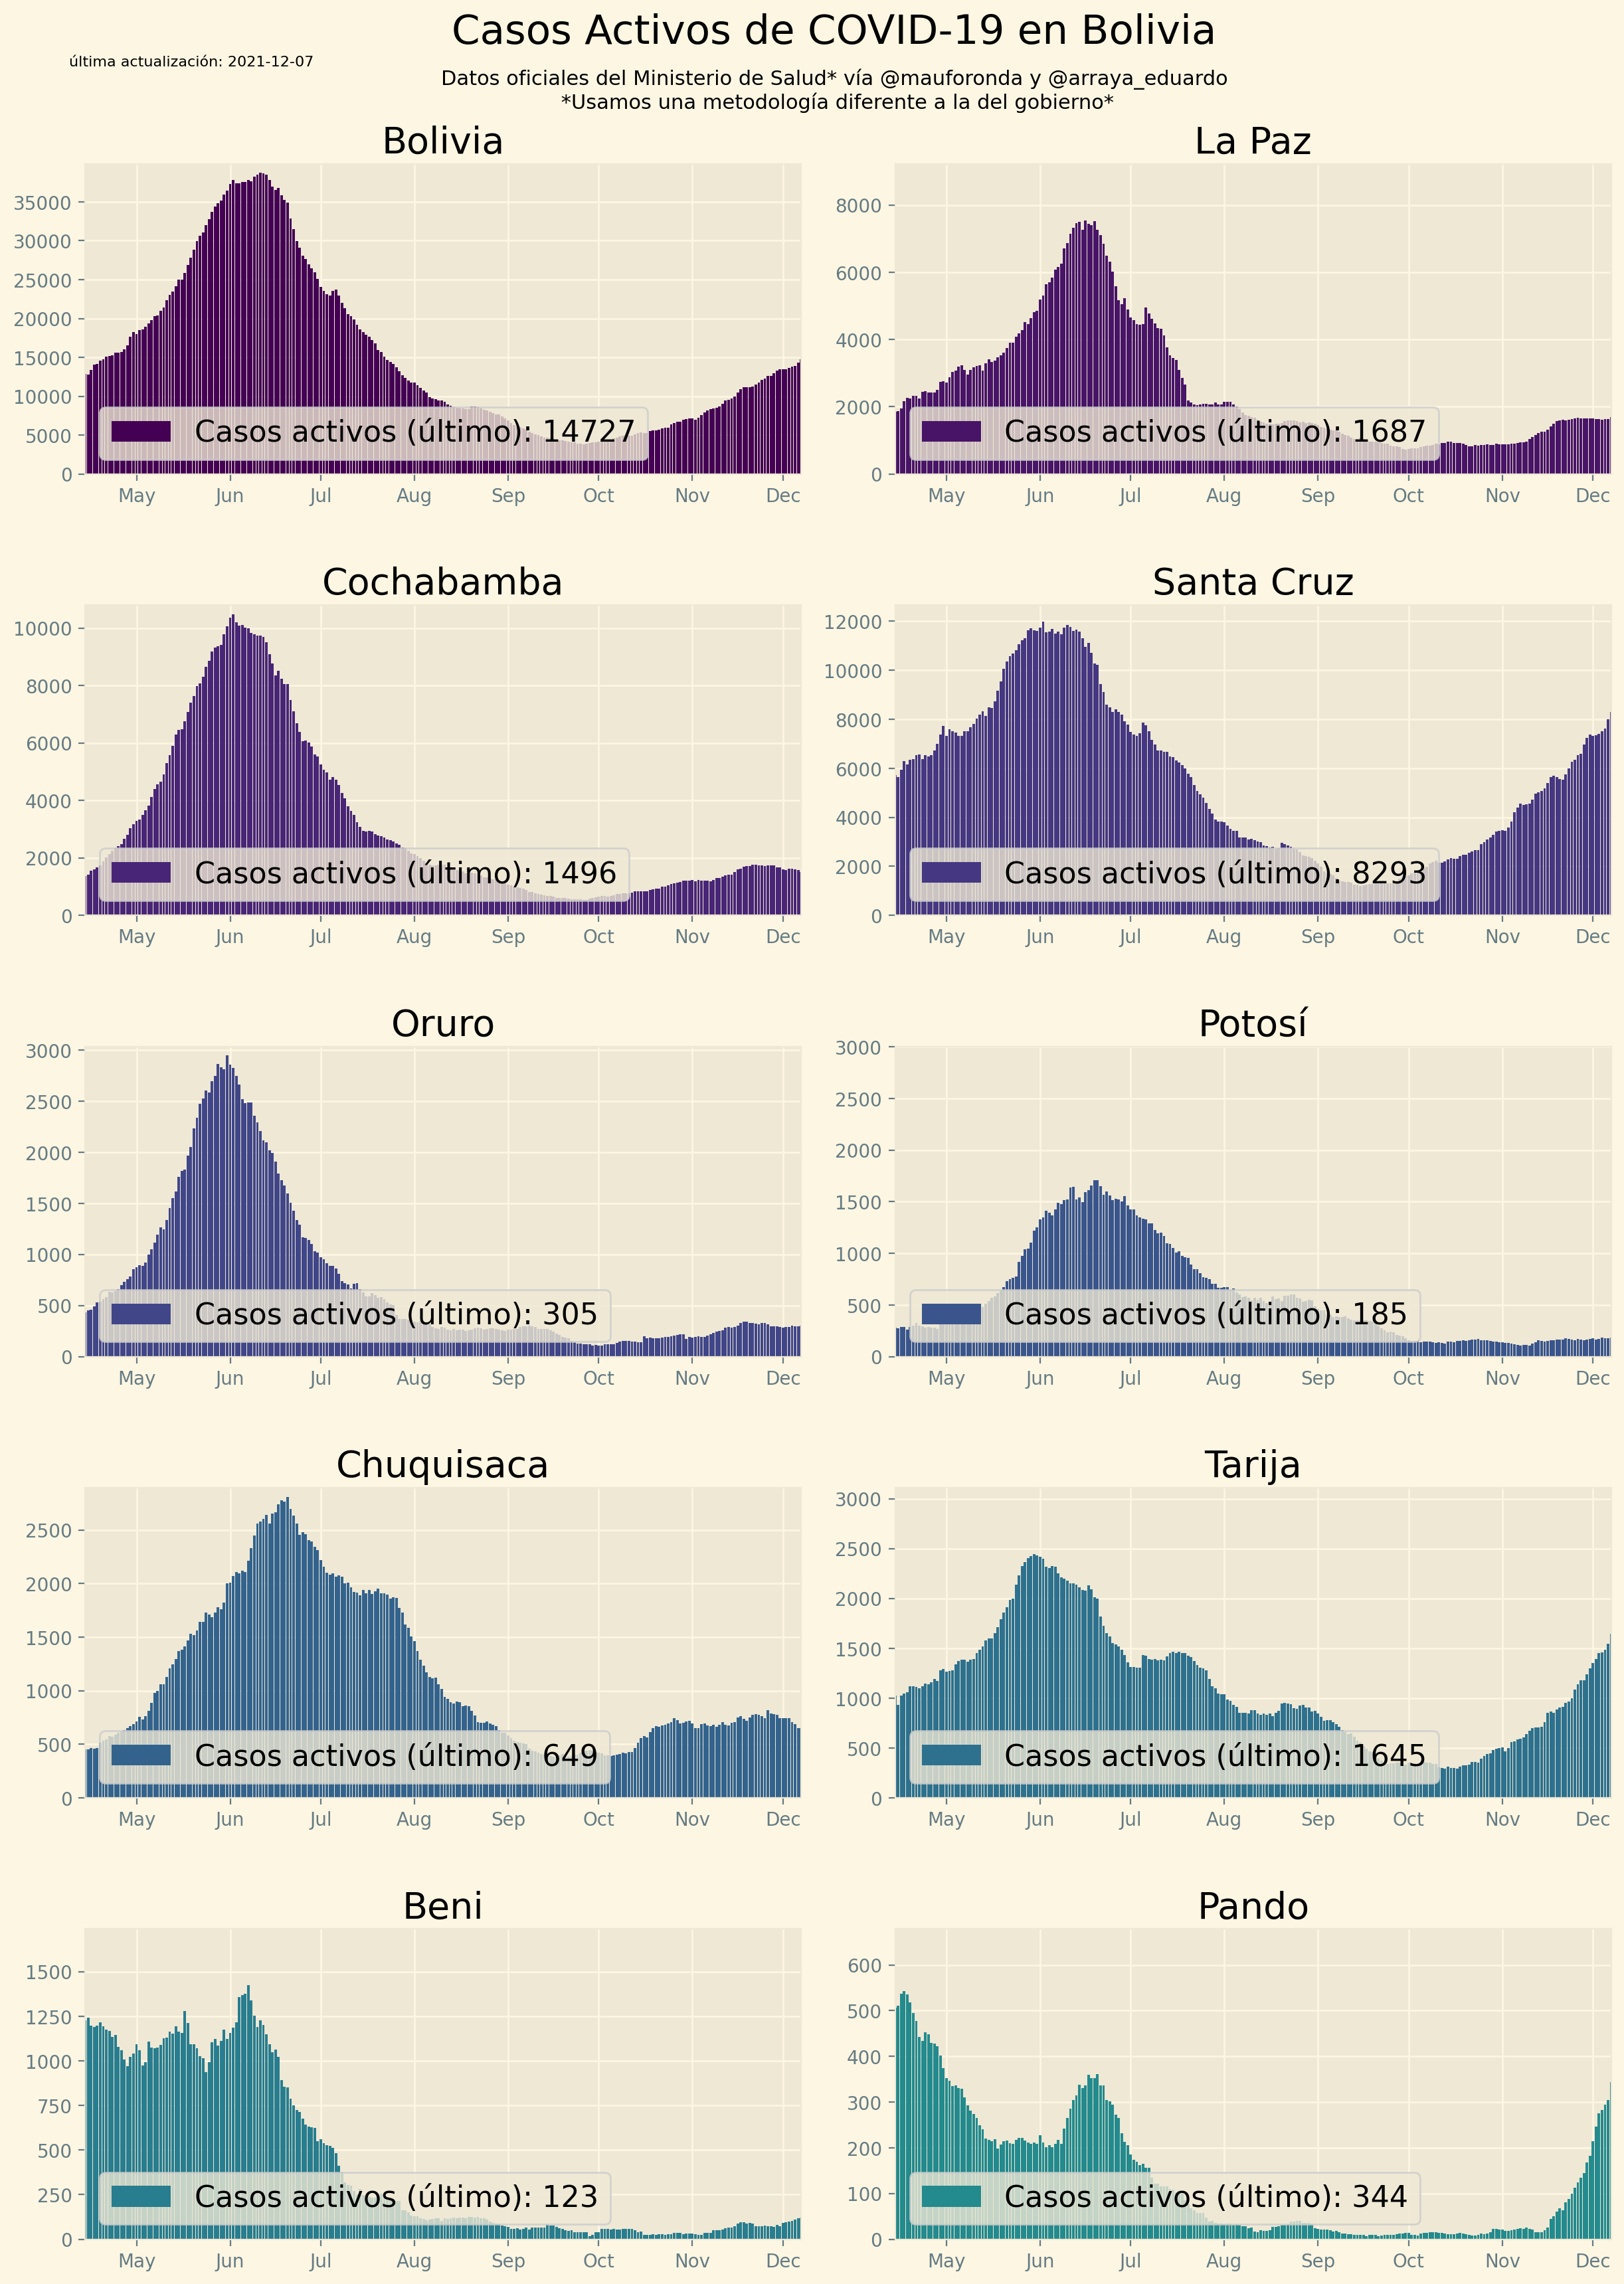

In [238]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=200)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

# background_color = "#d0d0d0"
# background_color2 = "w"

# fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia", fontsize= 22, y=1.065)
fig.text(0.5,1.02,"Datos oficiales del Ministerio de Salud* vía @mauforonda y @arraya_eduardo\n *Usamos una metodología diferente a la del gobierno*", fontsize=11, ha="center")
fig.text(.02, 1.04,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

for i in range(10):
    axs[i].grid(zorder=3)
    axs[i].set_title(activos.columns[i], fontsize=20) 
    axs[i].bar(activos.index, activos[activos[400:-1].columns[i]], label="Casos activos (último): {}".format(activos.iloc[-1,i].astype(int)),
              width=.85, zorder=2, 
              color = cm.get_cmap("viridis",20)(range(0,10))[i])
    # axs[i].set_facecolor(background_color2)
    axs[i].legend(fontsize=16, loc="lower left")
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    axs[i].set_xlim(activos.index[400], activos.index[-1])
    axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)

fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [239]:
activos_ultimo = activos[-1:]
activos_ultimo.T

2021-12-07
Bolivia        14727.0
La Paz          1687.0
Cochabamba      1496.0
Santa Cruz      8293.0
Oruro            305.0
Potosí           185.0
Chuquisaca       649.0
Tarija          1645.0
Beni             123.0
Pando            344.0

In [240]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


Activos por cada 10,000 habitantes
Bolivia                              12.673838
La Paz                                5.763580
Cochabamba                            7.373090
Santa Cruz                           24.608309
Oruro                                 5.669145
Potosí                                2.050998
Chuquisaca                           10.188383
Tarija                               28.216123
Beni                                  2.562500
Pando                                22.337662

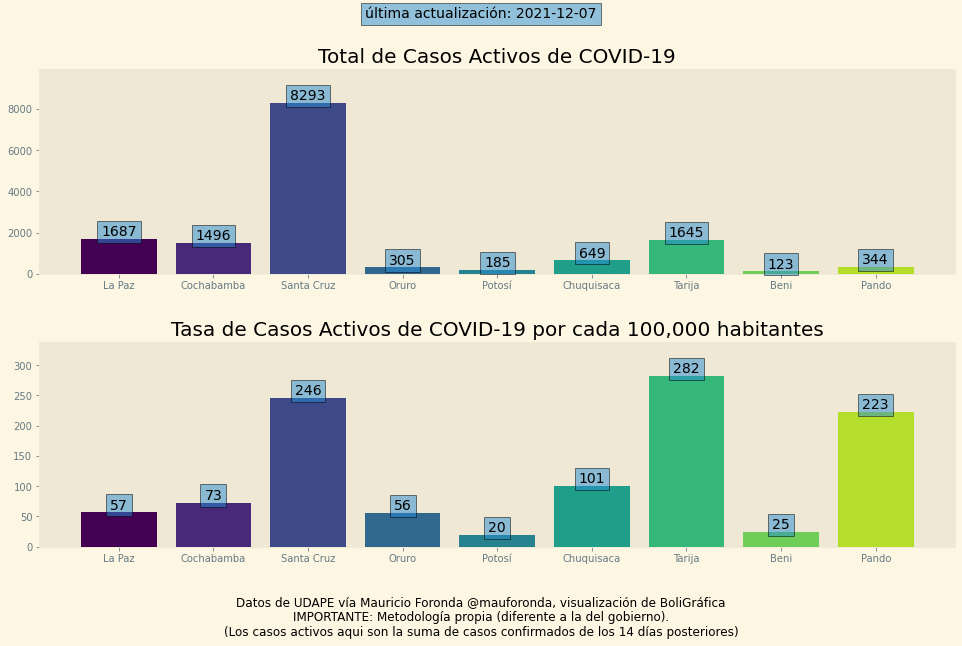

In [241]:
fig, axs = plt.subplots(2,1, figsize=(14,8))

fig.text(.5, 1,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=14, ha="center", bbox={"alpha":0.5})
fig.text(0.5,-.073,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica\nIMPORTANTE: Metodología propia (diferente a la del gobierno).\n(Los casos activos aqui son la suma de casos confirmados de los 14 días posteriores)", 
         fontsize=12, ha="center")

bar1 = axs[0].bar(activos_ultimo.T.index[1:10], activos_ultimo.T[1:10][activos_ultimo.T.columns[0]], color = cm.get_cmap("viridis",10)(range(10)))
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.2)
axs[0].bar_label(bar1, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[0].grid(axis="both")


bar2 = axs[1].bar(activos_ultimo_pc.T.index[1:10], (activos_ultimo_pc.T[1:10]["Activos por cada 10,000 habitantes"]*10).astype(int), color = cm.get_cmap("viridis",10)(range(10)))
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 100,000 habitantes", fontsize = 20)
axs[1].bar_label(bar2, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[1].grid(axis="both")
axs[1].set_ylim(0,activos_ultimo_pc.T[1:10][activos_ultimo_pc.T.columns[0]].max()*12)





fig.tight_layout(pad=3)

fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")

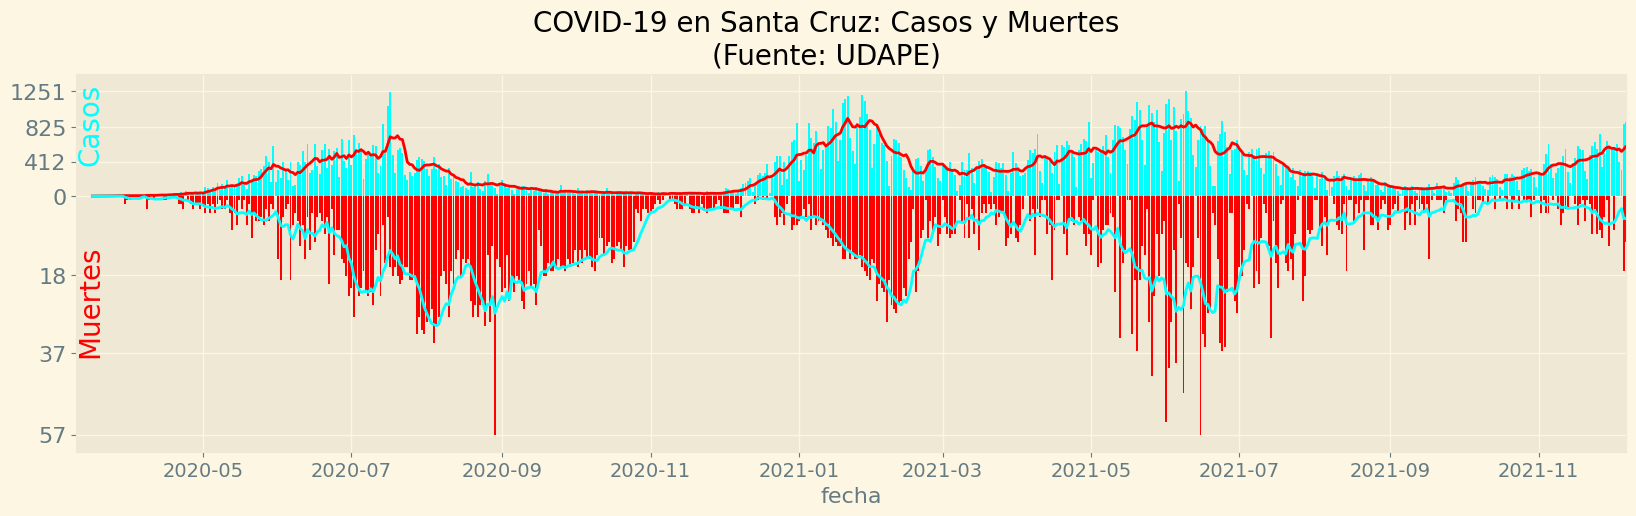

In [242]:

def plotter(region, start=0, end = -1, multiplier  = -50, bar_label=False):
    
    casos = casos_diarios.loc[:,region]
    muertes = muertes_diarias.loc[:,region]

    fig, axs = plt.subplots(1,1,figsize=(20,5), dpi=100)
    fig.suptitle("COVID-19 en {}: Casos y Muertes\n(Fuente: UDAPE)".format(region), fontsize=20, y =1.01)


    barc = axs.bar(casos.index, casos, color="cyan")   
    barm = axs.bar(muertes.index, muertes * multiplier, color="r")
    axs.plot(casos.index, casos.rolling(7).mean(), color="r")
    axs.plot(muertes.index, muertes.rolling(7).mean() * multiplier , color="cyan")

    axs.set_xlim(xmin=casos.index[start], xmax=casos.index[-1])
    # axs.set_ylim(muertes[start:].max()*-1.1, casos[start:].max()*1.2)
    axs.set_xlabel("fecha", fontsize=16)
    axs.set_yticks([casos.max()*1,
                    casos.max()*.66,
                    casos.max()*.33,
                    0,
                    muertes.max()*.33 * multiplier,
                    muertes.max()*.66 * multiplier,
                    muertes.max()* 1 * multiplier
                   ])
    axs.set_yticklabels([
                    int(casos.max()*1),
                    int(casos.max()*.66),
                    int(casos.max()*.33),
                    (0),
                    int(muertes.max()*.33),
                    int(muertes.max()*.66),
                    int(muertes.max()* 1)
                   ],
        fontsize=16
        )
    plt.xticks(fontsize=14)

    if bar_label==True:
        axs.bar_label(barc)
        axs.bar_label(barm)



    axs.annotate("Casos",
                xy=(casos.index[start], casos.max()*.35),
                fontsize=20,
                color="cyan",
                rotation=90)
    axs.annotate("Muertes",
                xy=(muertes.index[start], muertes.max()*.65*multiplier),
                fontsize=20,
                color="r",
                rotation=90)

###############################################################################################
###############################################################################################
###############################################################################################


   
# for i in casos_diarios.columns:
#     plotter(i)
    
plotter("Santa Cruz")


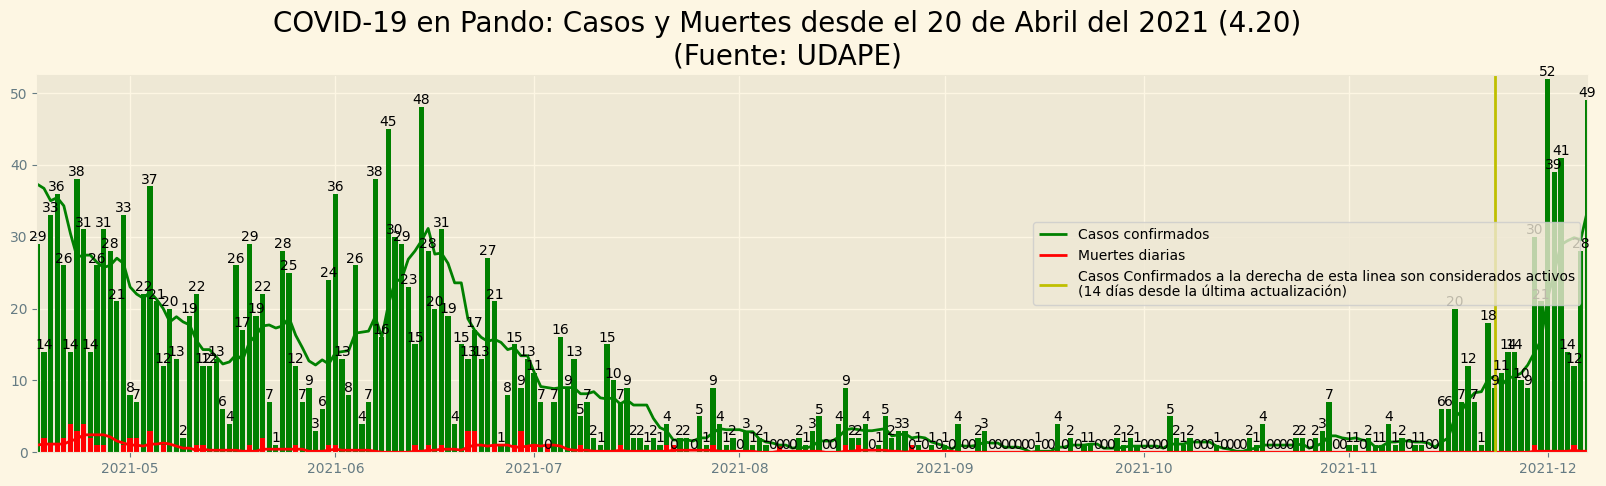

In [243]:
#explicacion de como funcionan los casos activos, malisima
def plotter1(region, start=0, extra=0):

    casos = casos_diarios.loc[:,region]
    muertes = muertes_diarias.loc[:,region]

    fig, axs = plt.subplots(1,1,figsize=(20,5), dpi=100)
    fig.suptitle("COVID-19 en {}: Casos y Muertes desde el 20 de Abril del 2021 (4.20)\n(Fuente: UDAPE)".format(region), fontsize=20, y =1.01)


    barc = axs.bar(casos.index, casos, color="g")   
    barm = axs.bar(muertes.index, muertes, color="r")
    axs.plot(casos.index, casos.rolling(7).mean(), color="g", label="Casos confirmados")
    axs.plot(muertes.index, muertes.rolling(7).mean(), color="r", label="Muertes diarias")
    axs.axvline(muertes.index[-15], color="y", label="Casos Confirmados a la derecha de esta linea son considerados activos\n(14 días desde la última actualización)")
    axs.bar_label(barc)
    axs.set_xlim(xmin=casos.index[start], xmax=casos.index[-1])
    axs.set_ylim(0, casos[start:].max()*1.01) 
    axs.legend(loc="center right")
    
plotter1("Pando", start=403)
# plotter1("Beni", start=403)

<BarContainer object of 15 artists>

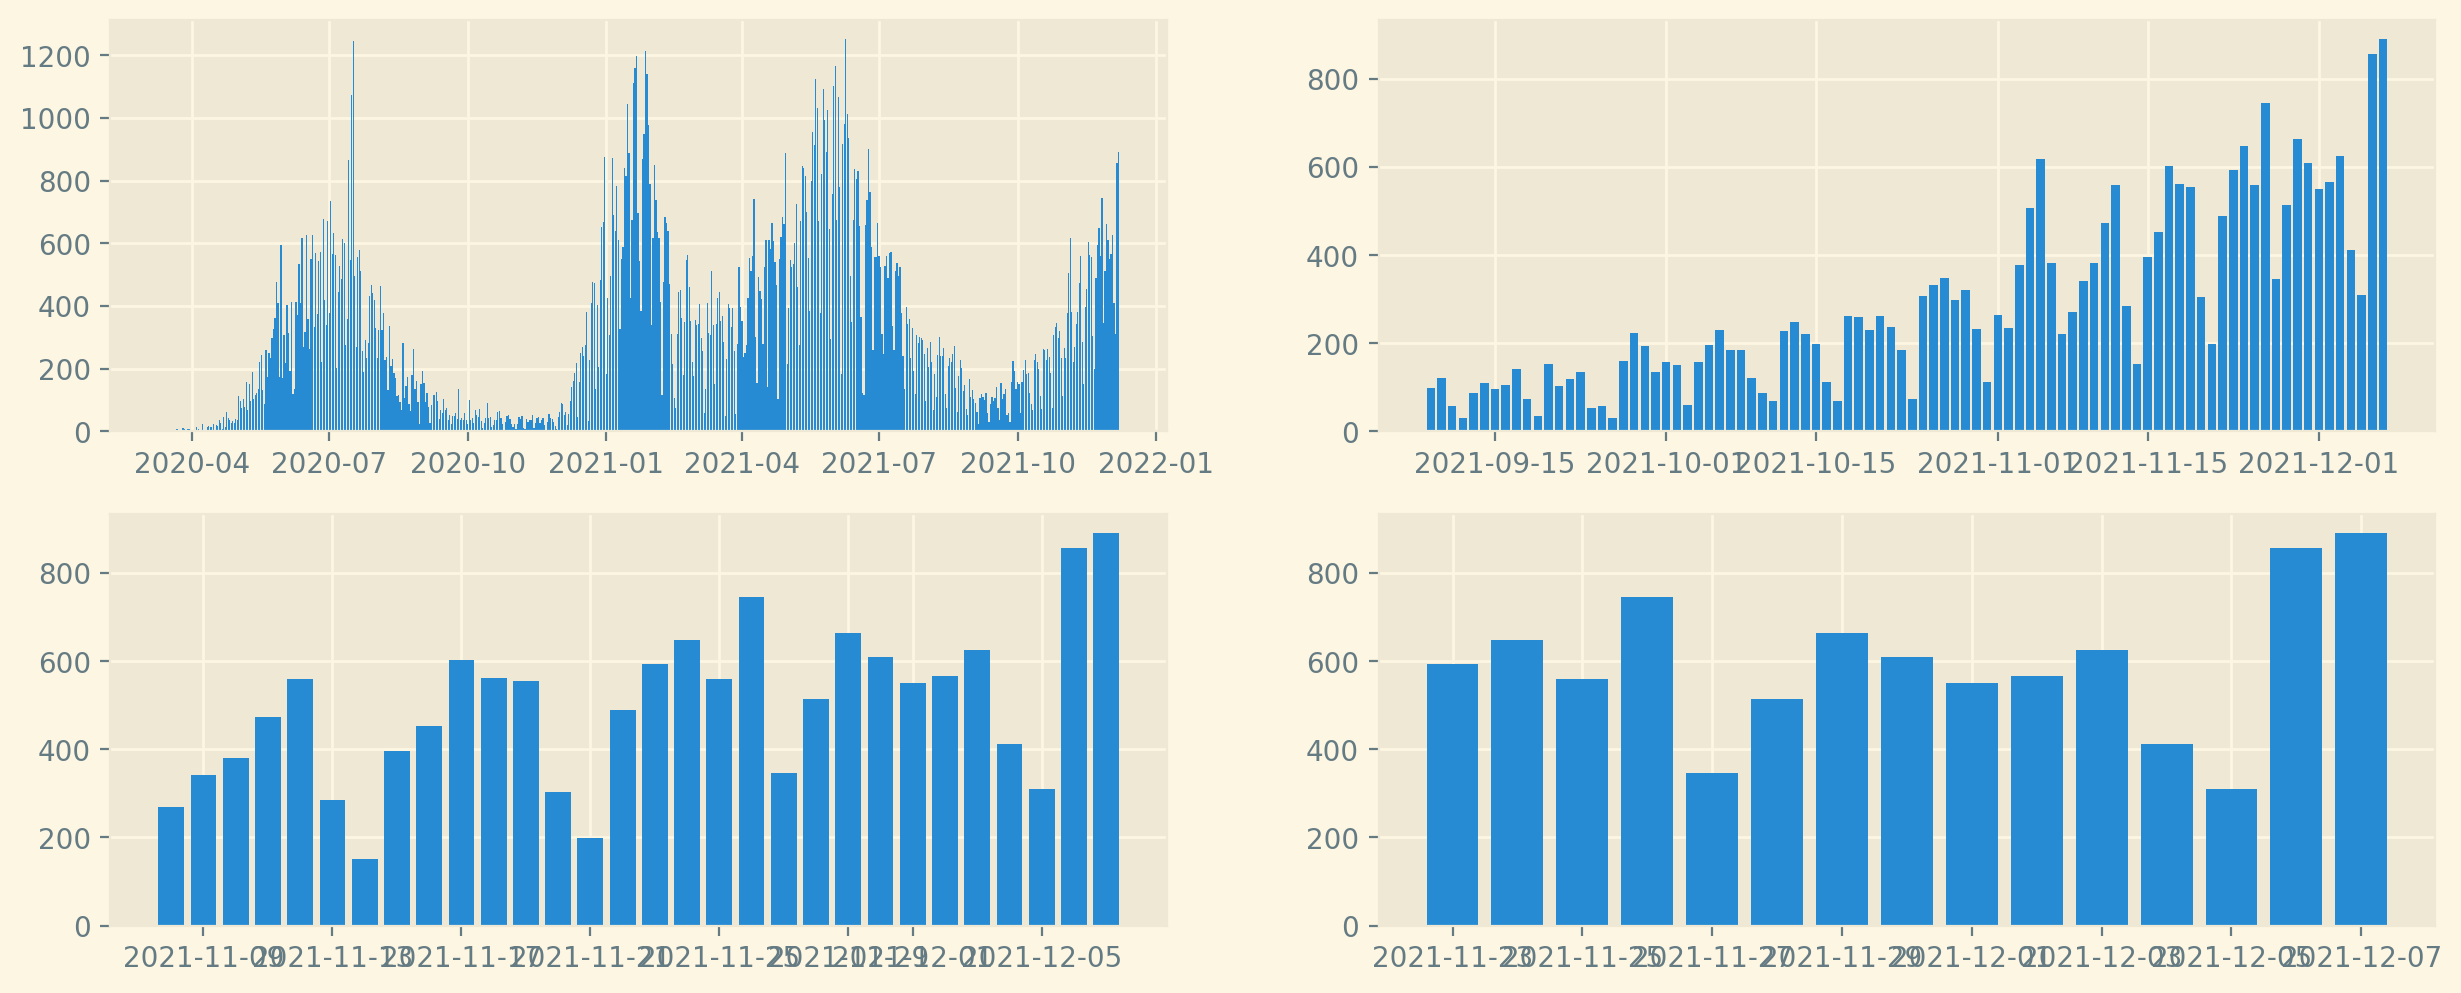

In [244]:
scz = casos_diarios["Santa Cruz"]
scz.index = pd.to_datetime(scz.index)

fig, axs = plt.subplots(2,2,figsize=(15,6), dpi=200)
axs= axs.flatten()

axs[0].bar(scz.index, scz)
lim2= -90
axs[1].bar(scz.index[lim2:], scz[lim2:])
lim3= -30
axs[2].bar(scz.index[lim3:], scz[lim3:])
lim4= -15
axs[3].bar(scz.index[lim4:], scz[lim4:])